In [ ]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(1, '../crispr_library_prep/crispr_library_prep')
import CrisprLibraryPrep as crispr_library_prep

: 

In [14]:
import numpy as np

In [39]:
from typing import List, Tuple
import pandas as pd

target_coverage_percentage = 0.7
max_target_coverage_input = 600
suggested_target_coverage_amounts = [70, 100, 150, 200, 250, 300, 400, 500, 600]

sample_sheet = pd.DataFrame({
    "sample_name": ["sample1", "sample2", "sample3"],
    "gDNA_amount_ug": [2, 2, 1.5],
    "moi": [1, 3, 1],
    "guide_library_size": 795,
    "target_coverage_input": 400,
    "perfection_rate": 0.62,
})

display(sample_sheet)


sample_name  gDNA_amount_ug  moi  guide_library_size  target_coverage_input  \
0     sample1             2.0    1                 795                    400   
1     sample2             2.0    3                 795                    400   
2     sample3             1.5    1                 795                    400   

   perfection_rate  
0             0.62  
1             0.62  
2             0.62

Processing sample: sample1
[0.4 0.8 1.2 1.6 2. ]


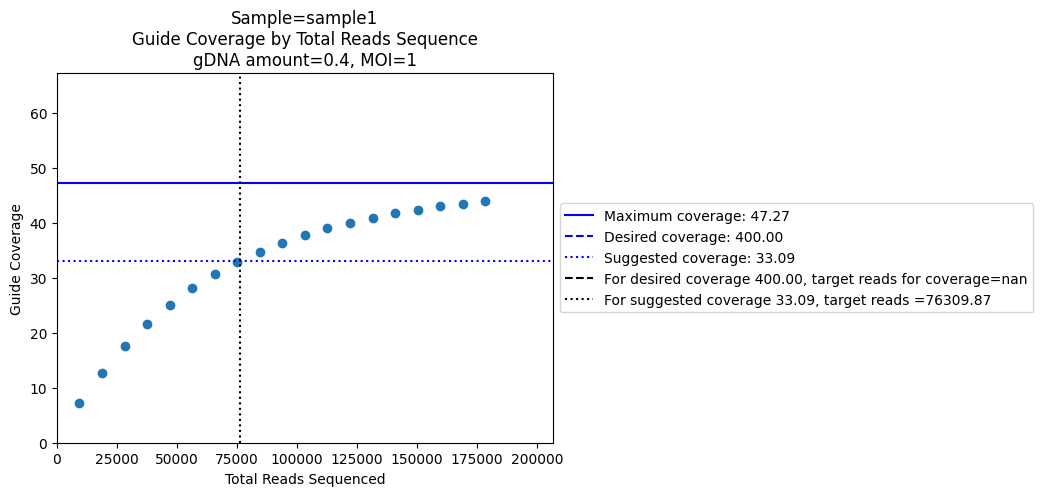

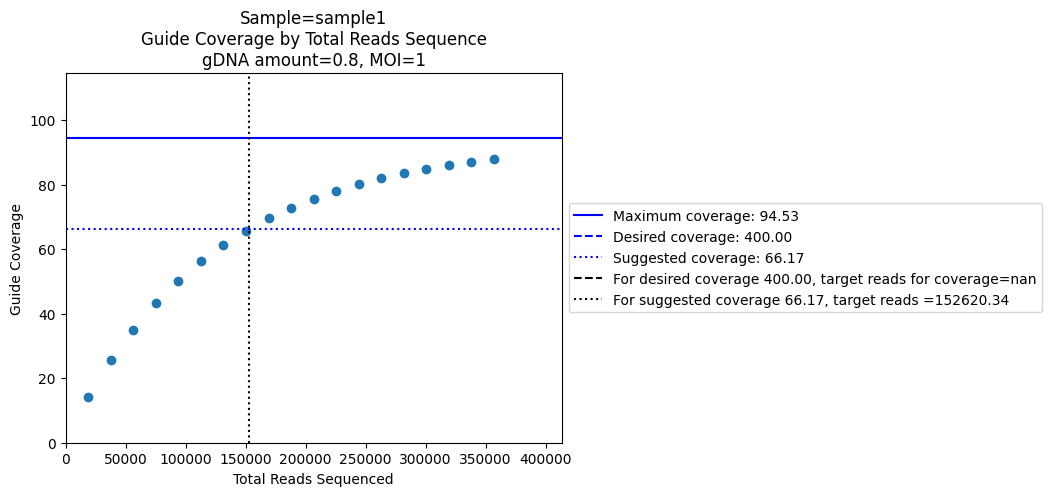

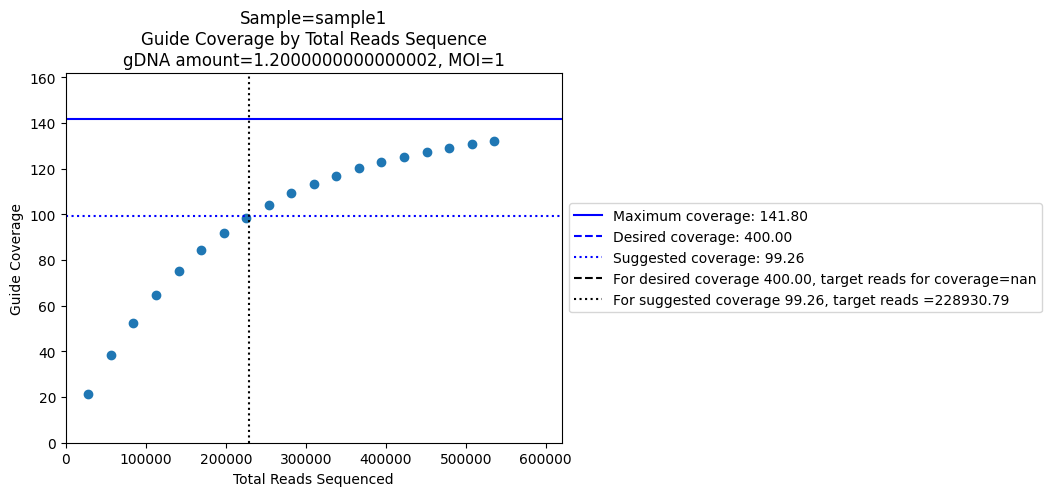

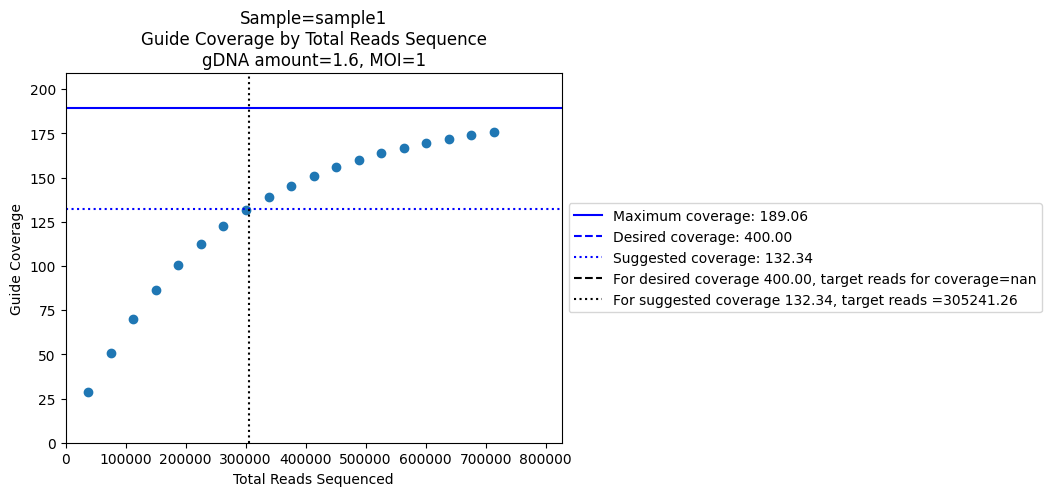

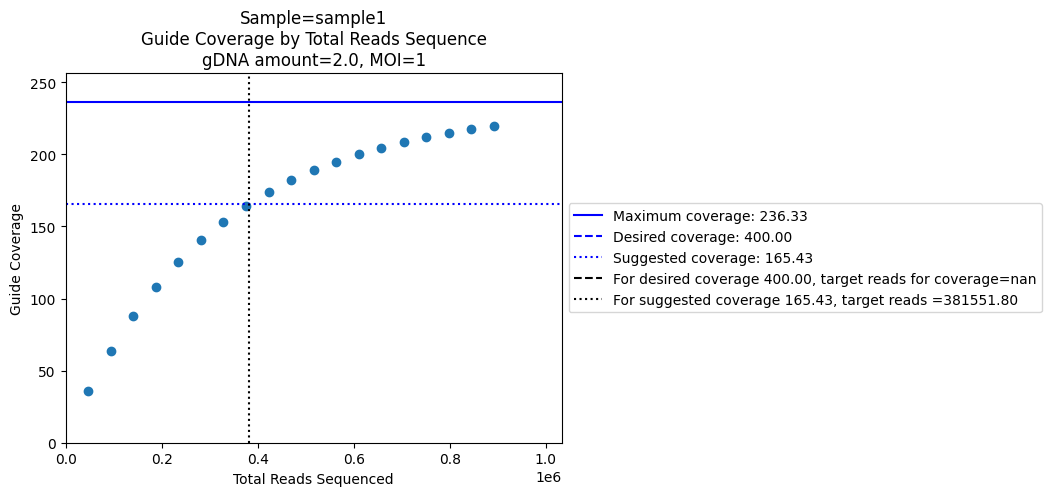

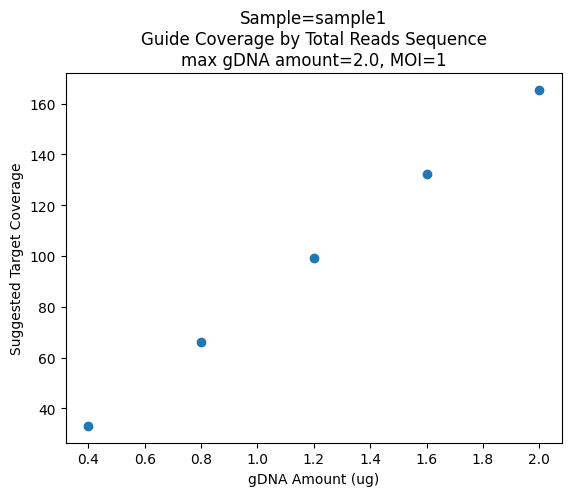

Processing sample: sample2
[0.4 0.8 1.2 1.6 2. ]


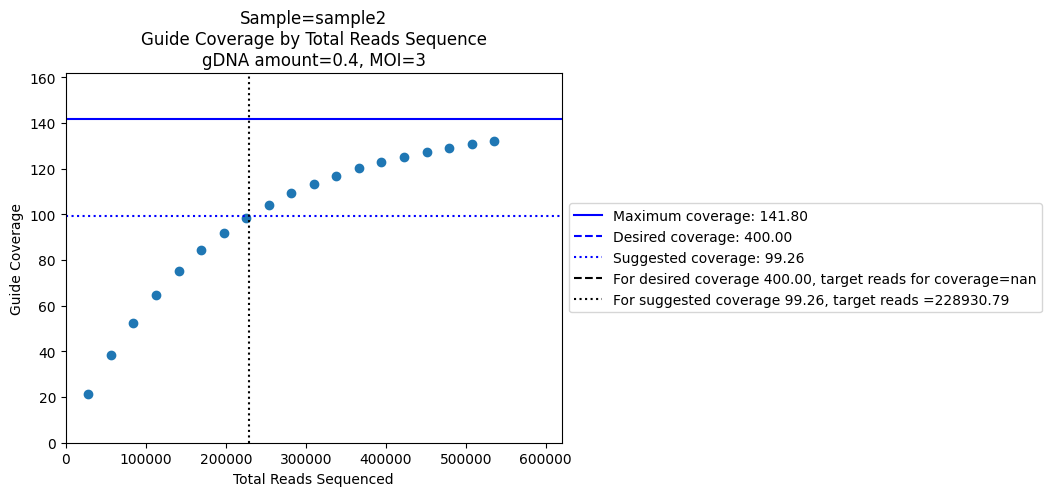

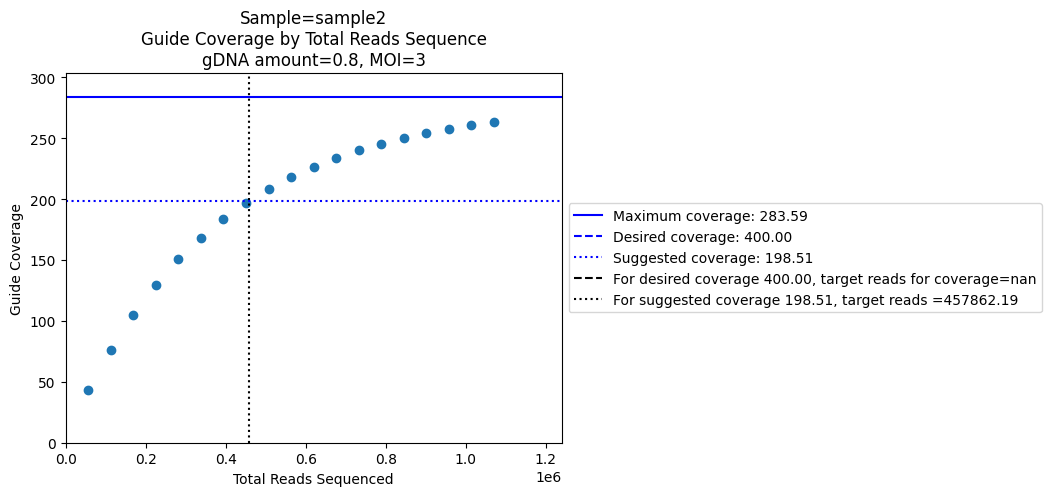

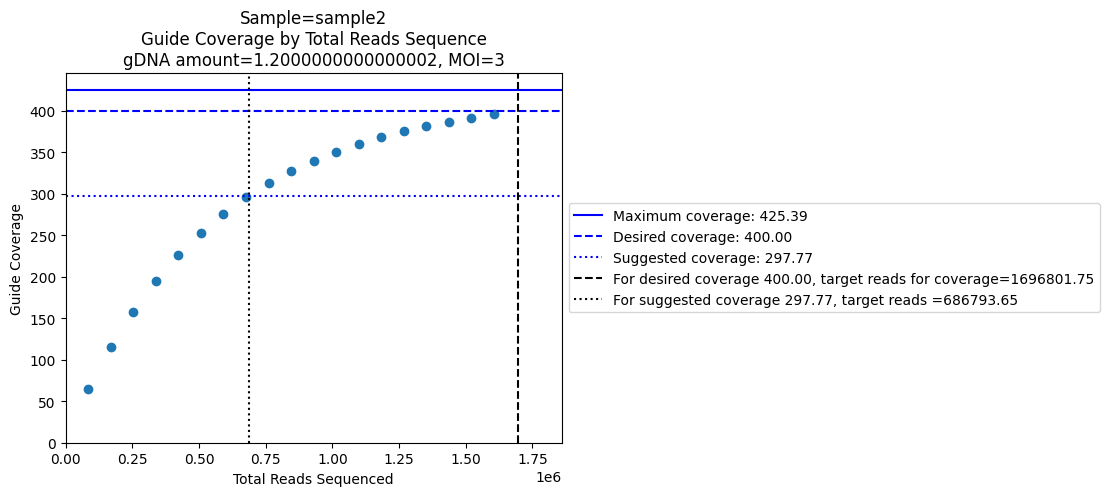

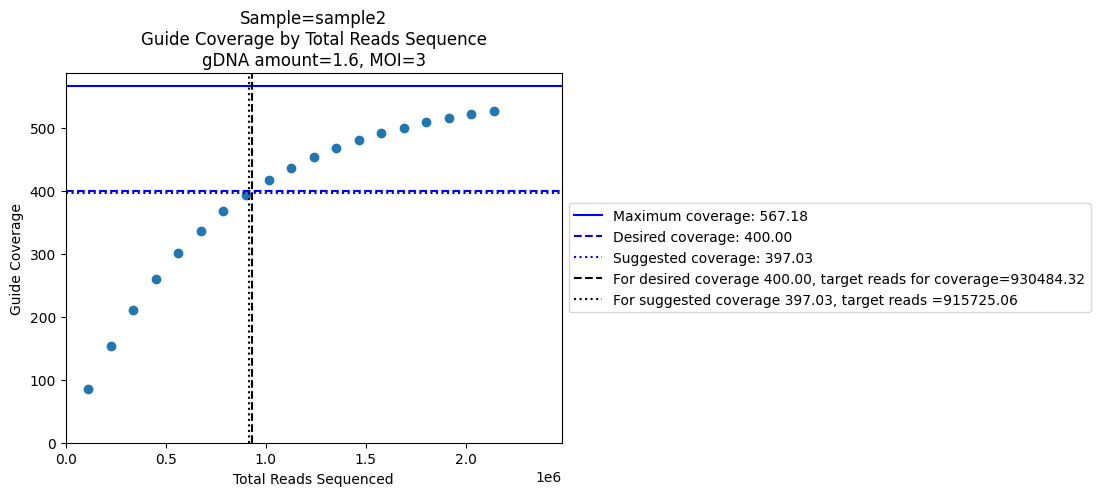

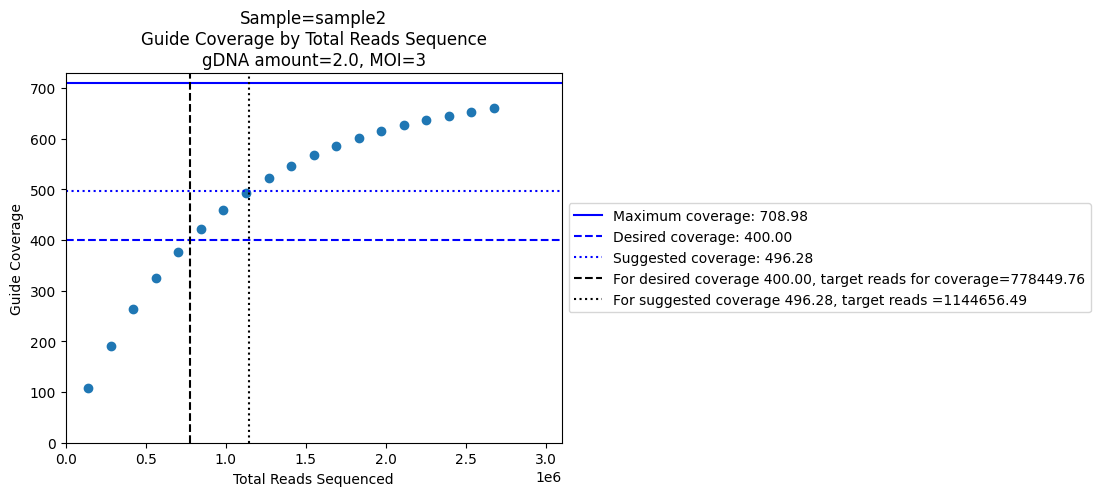

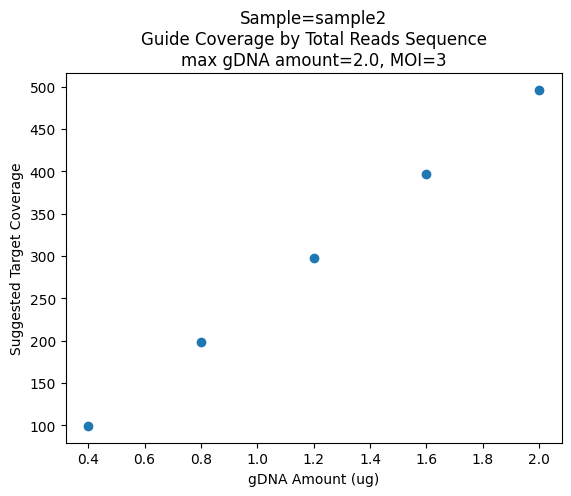

Processing sample: sample3
[0.3 0.6 0.9 1.2 1.5]


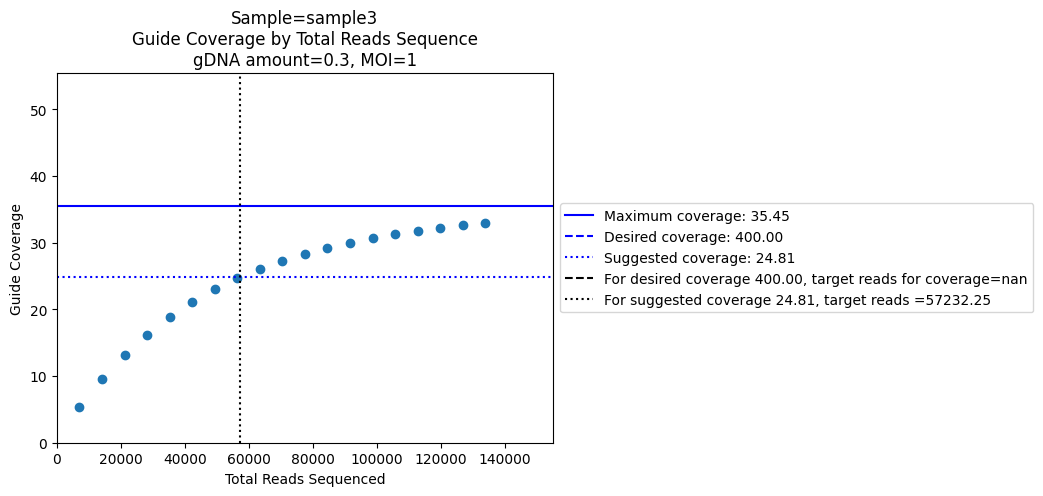

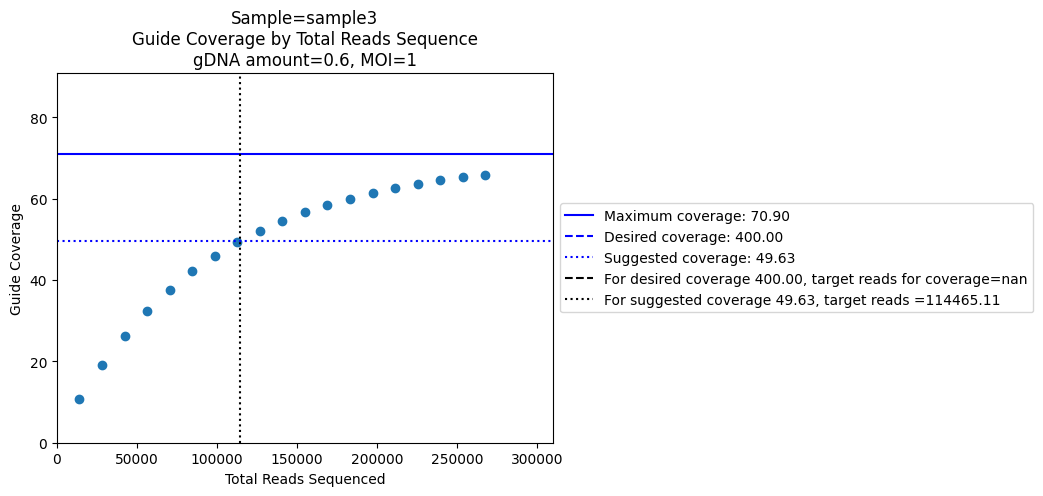

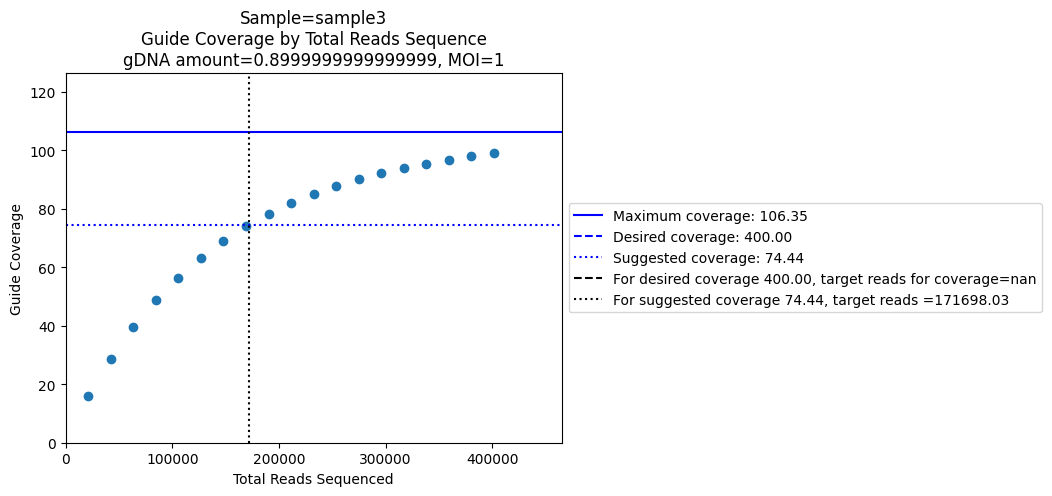

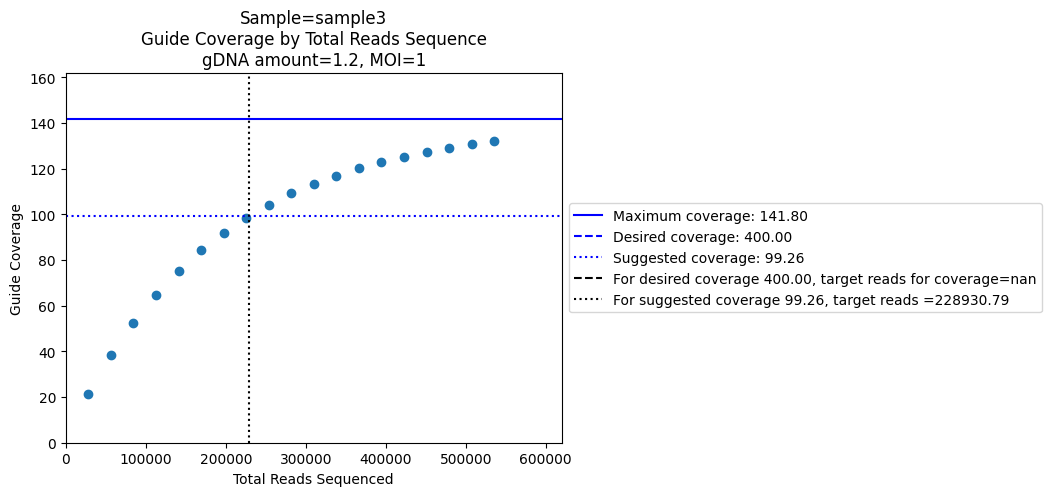

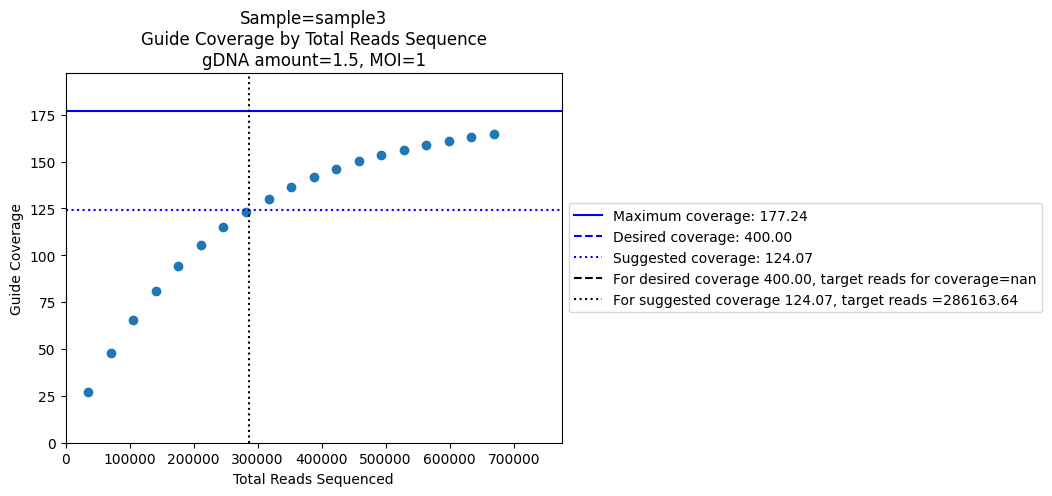

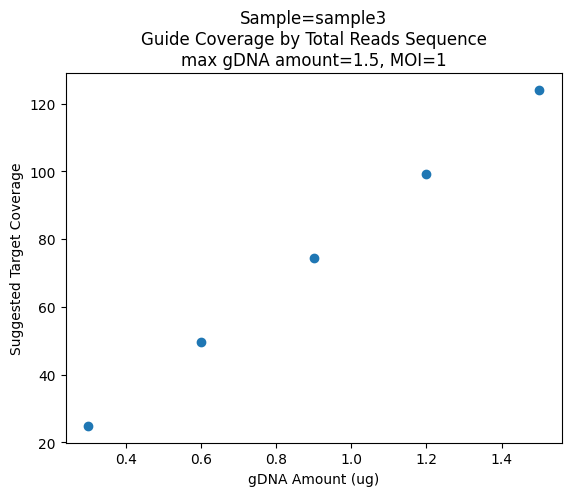

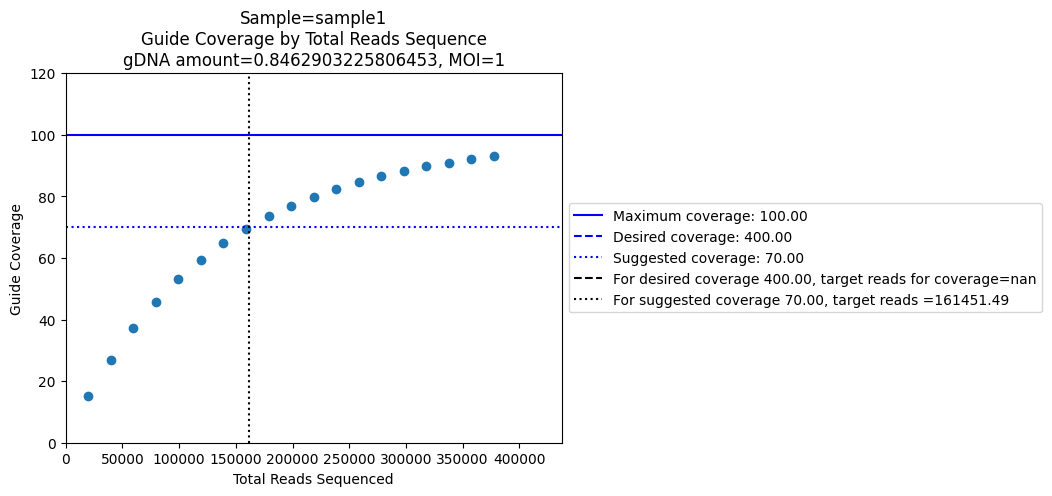

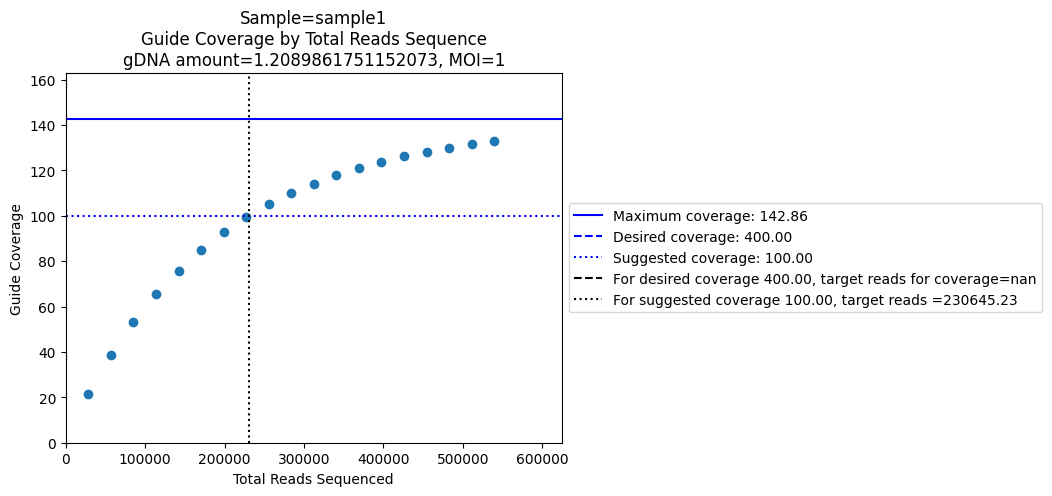

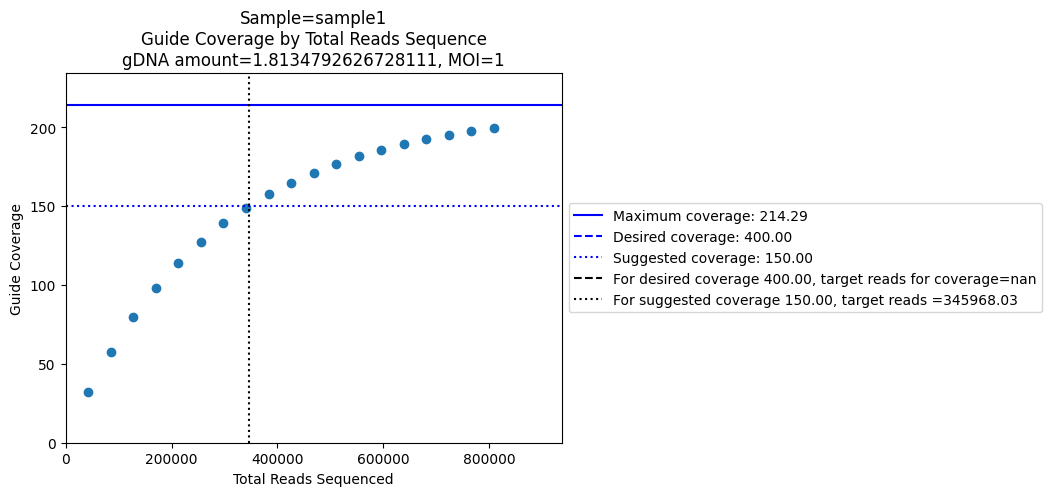

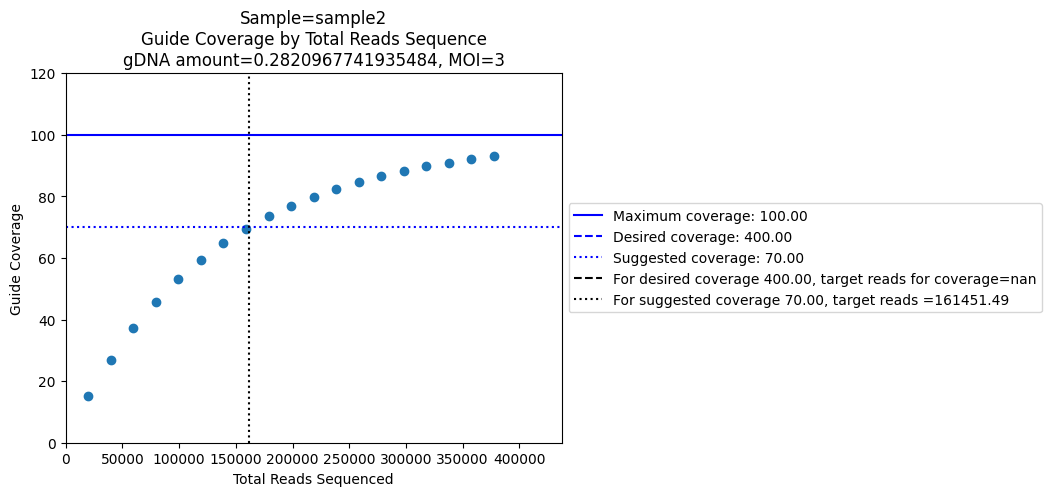

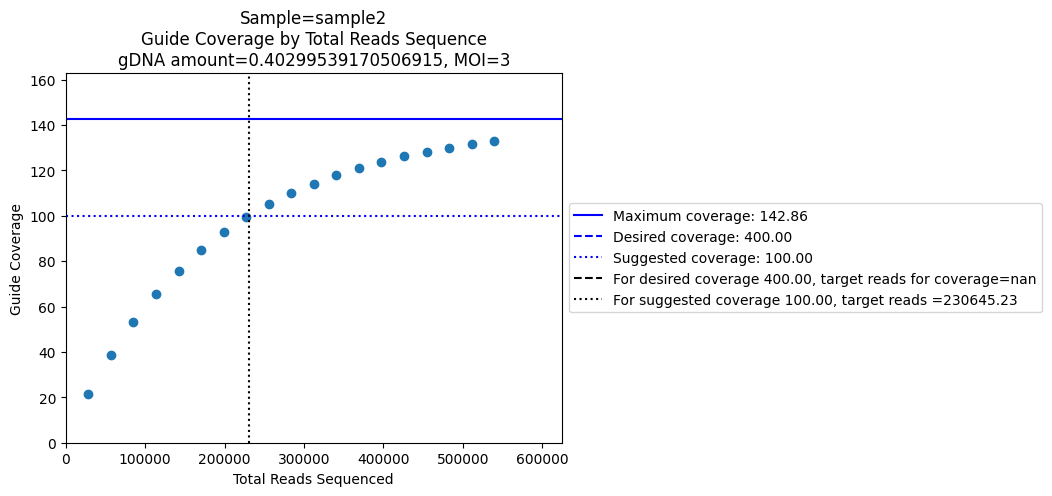

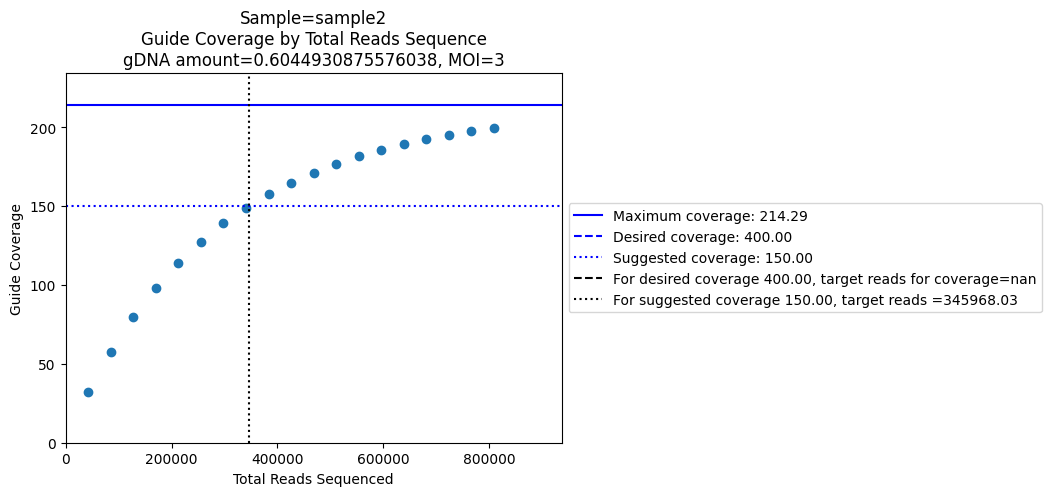

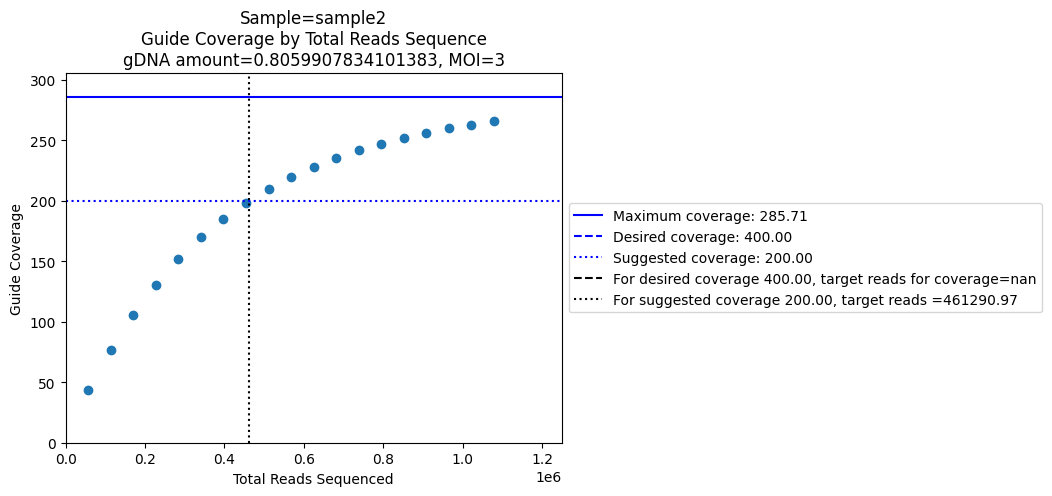

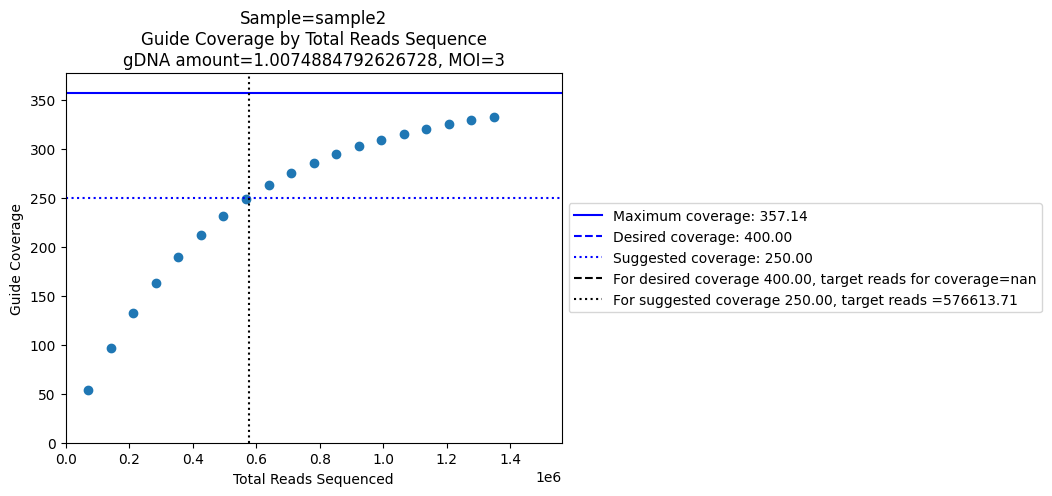

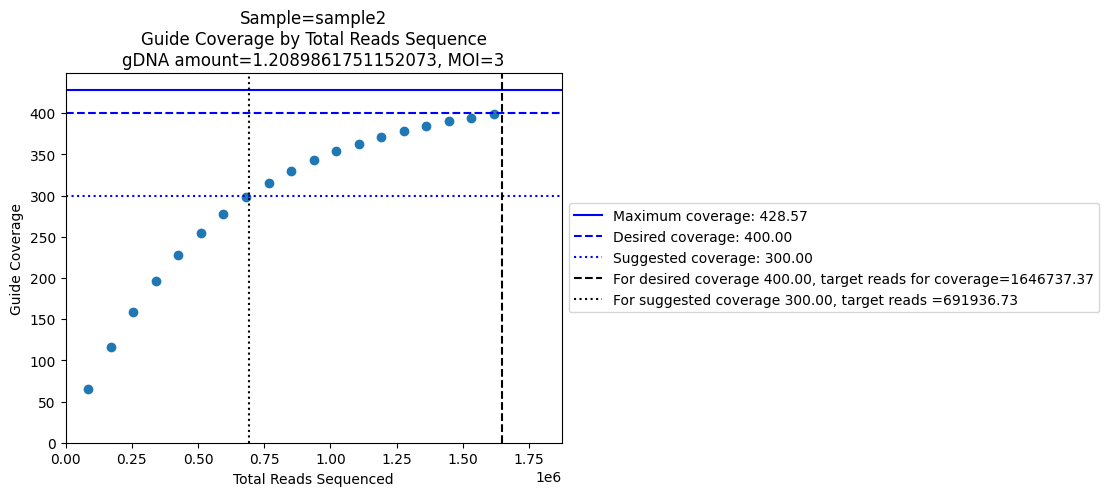

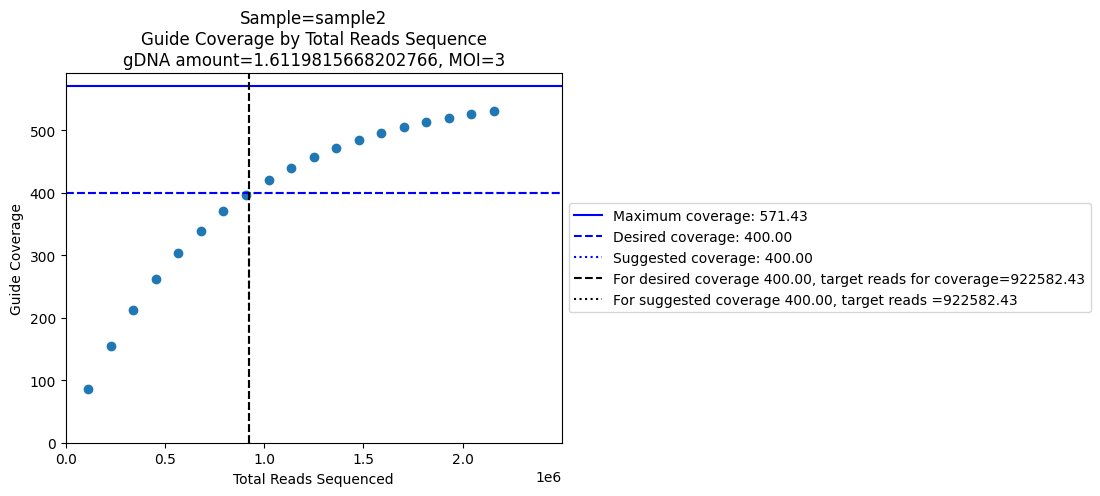

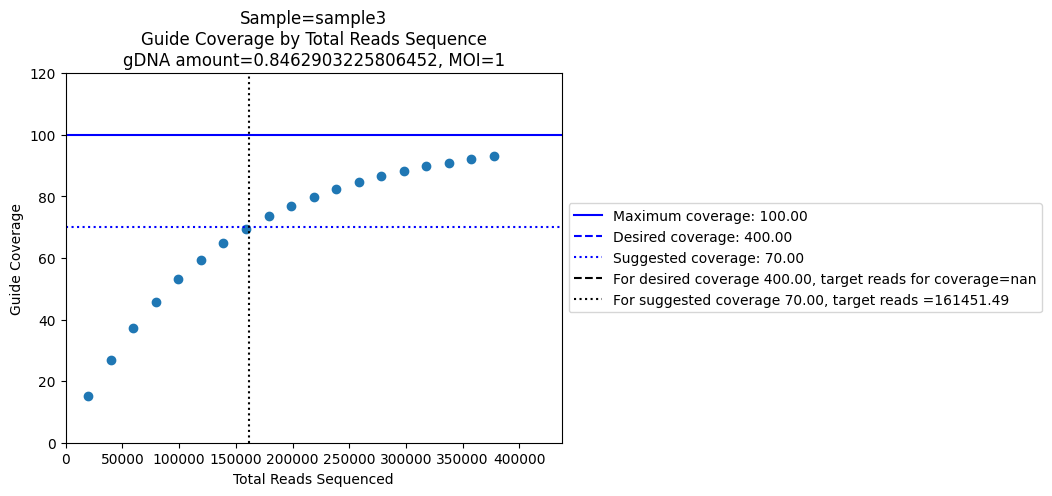

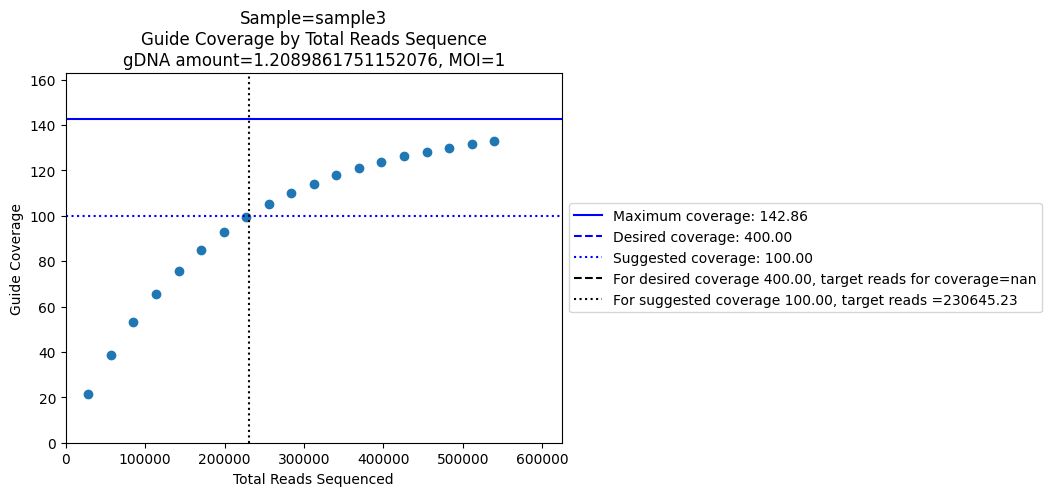

In [47]:
results = crispr_library_prep.process_sample_sheet(sample_sheet=sample_sheet, target_coverage_percentage=target_coverage_percentage, max_target_coverage_input=max_target_coverage_input, suggested_target_coverage_amounts=suggested_target_coverage_amounts
)

In [49]:
results["sample_sheet_with_results"]


sample_name  gDNA_amount_ug  moi  guide_library_size  target_coverage_input  \
0     sample1             2.0    1                 795                    400   
1     sample2             2.0    3                 795                    400   
2     sample3             1.5    1                 795                    400   

   perfection_rate target_gDNA_for_max_coverage  \
0             0.62                          nan   
1             0.62                          nan   
2             0.62                          nan   

  target_gDNA_target_coverage_suggested max_target_coverage_input  \
0                                  None                    600.00   
1                                  None                    600.00   
2                                  None                    600.00   

  max_gDNA_amount  ... reads_for_suggested_target_coverage_300  \
0            2.00  ...                                     NaN   
1            2.00  ...                           691936.726145   
2            1.50  ...                                     NaN   

  gDNA_for_suggested_target_coverage_400  \
0                                    NaN   
1                               1.611982   
2                                    NaN   

  coverage_for_suggested_target_coverage_400  \
0                                        NaN   
1                                      400.0   
2                                        NaN   

   reads_for_suggested_target_coverage_400  \
0                                      NaN   
1                            922582.432364   
2                                      NaN   

   gDNA_for_suggested_target_coverage_500  \
0                                     NaN   
1                                     NaN   
2                                     NaN   

   coverage_for_suggested_target_coverage_500  \
0                                         NaN   
1                                         NaN   
2                                         NaN   

   reads_for_suggested_target_coverage_500  \
0                                      NaN   
1                                      NaN   
2                                      NaN   

   gDNA_for_suggested_target_coverage_600  \
0                                     NaN   
1                                     NaN   
2                                     NaN   

   coverage_for_suggested_target_coverage_600  \
0                                         NaN   
1                                         NaN   
2                                         NaN   

   reads_for_suggested_target_coverage_600  
0                                      NaN  
1                                      NaN  
2                                      NaN  

[3 rows x 40 columns]

### Junk code below

Processing sample: sample1
[0.4 0.8 1.2 1.6 2. ]


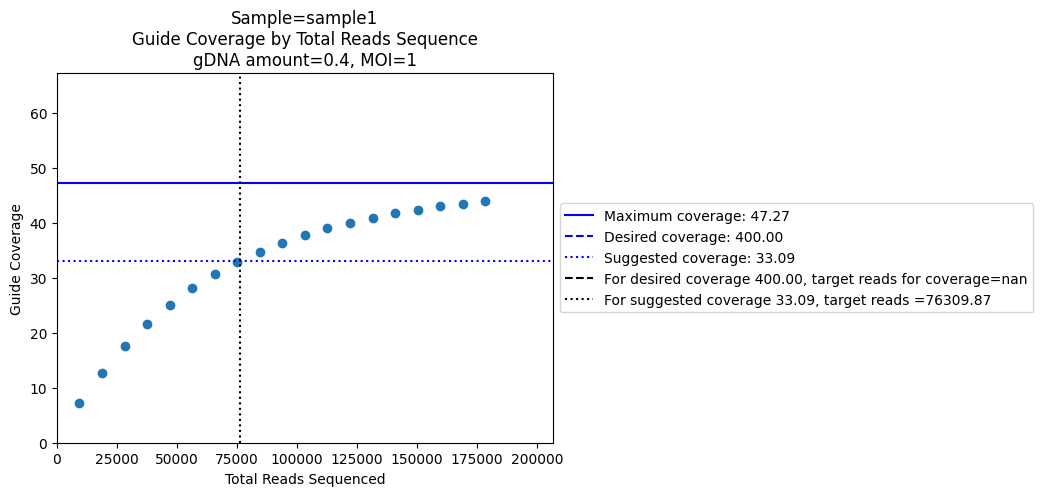

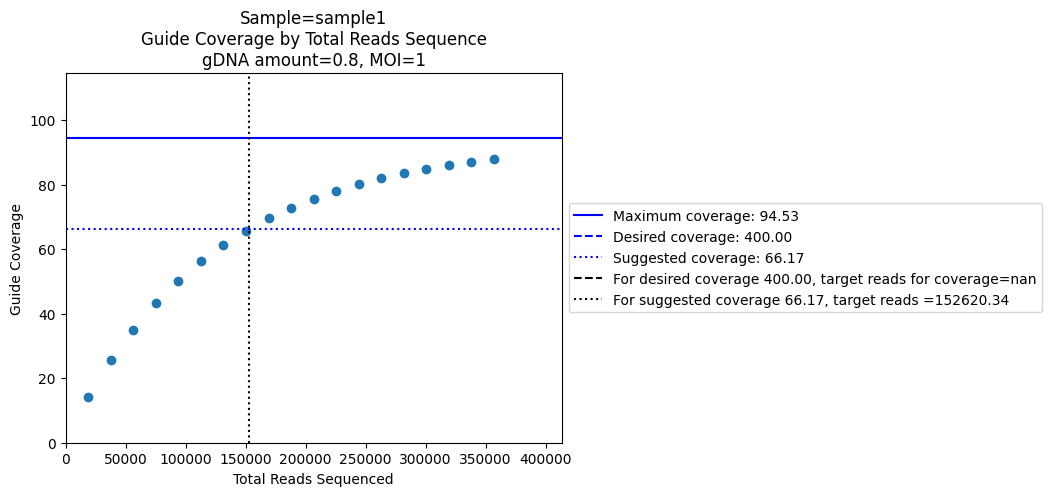

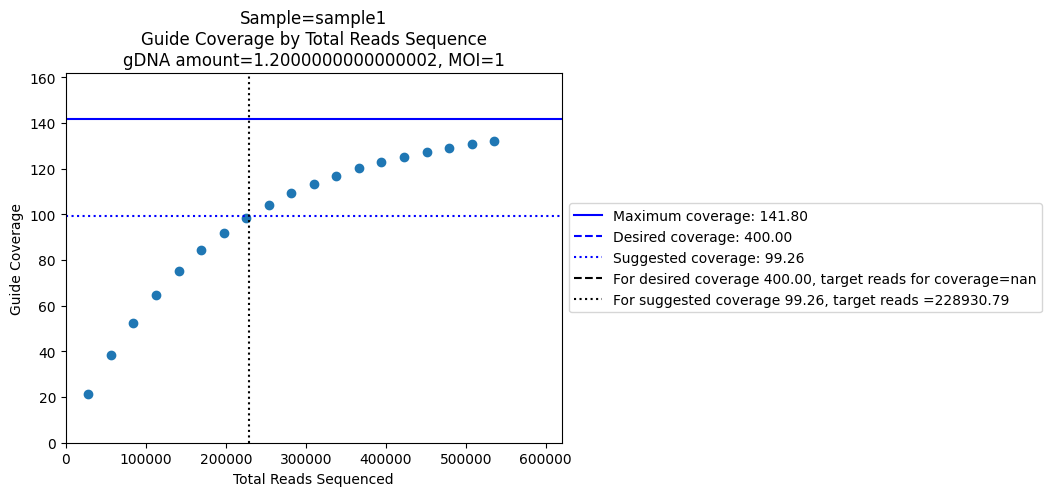

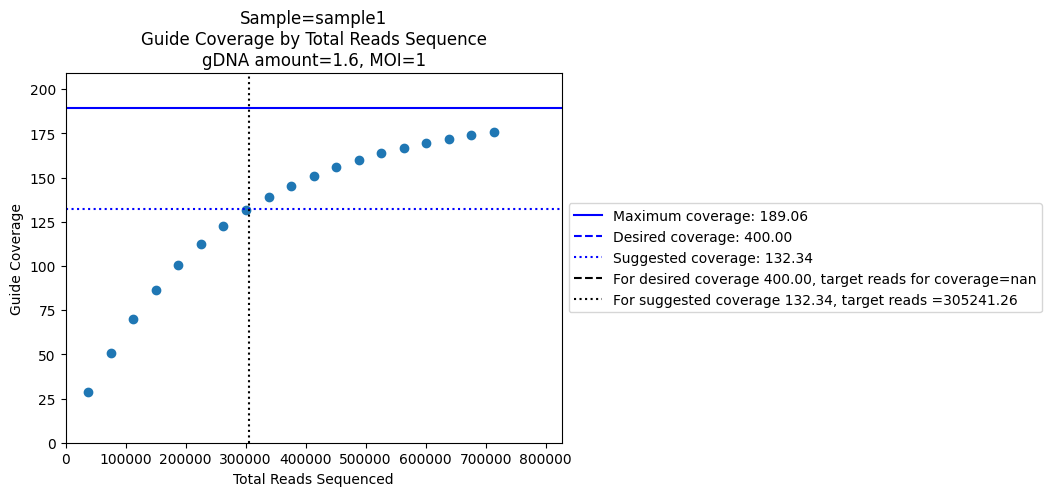

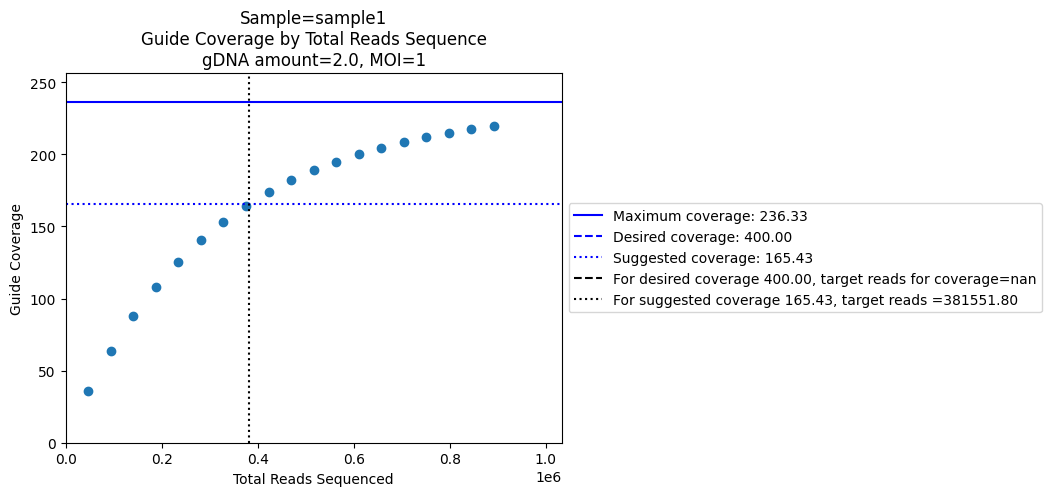

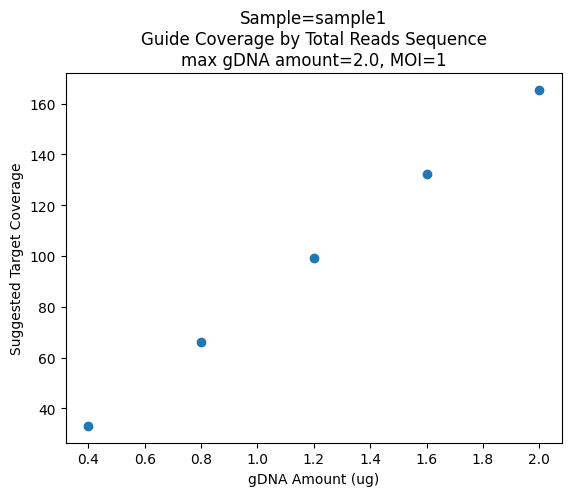

Processing sample: sample2
[0.4 0.8 1.2 1.6 2. ]


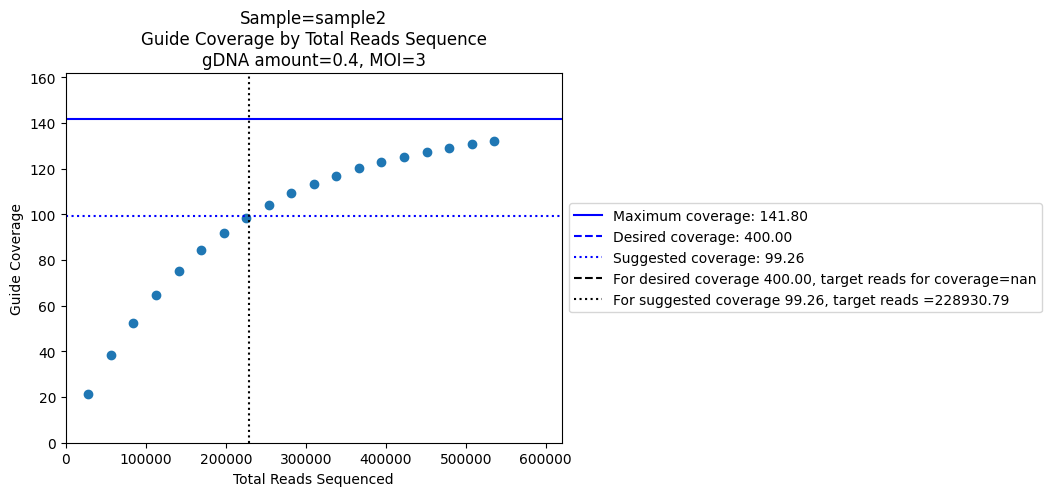

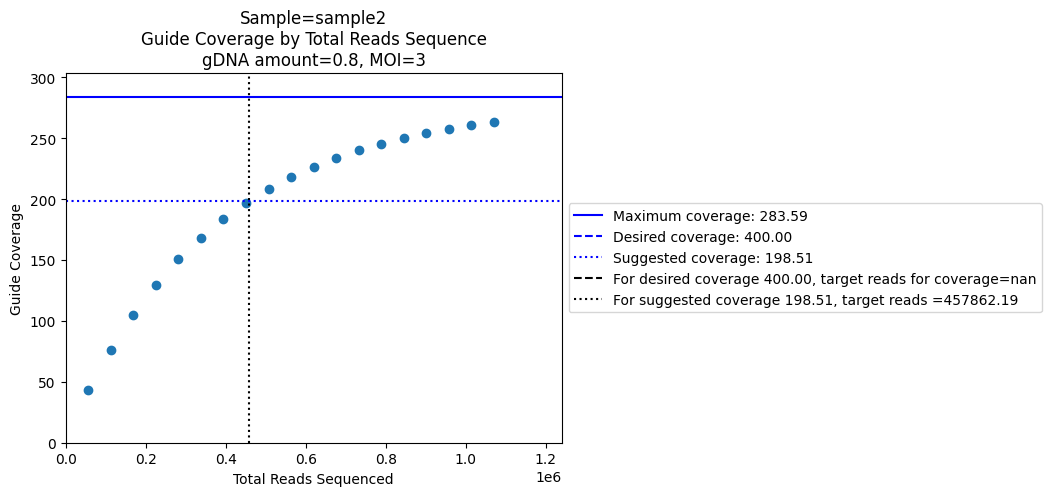

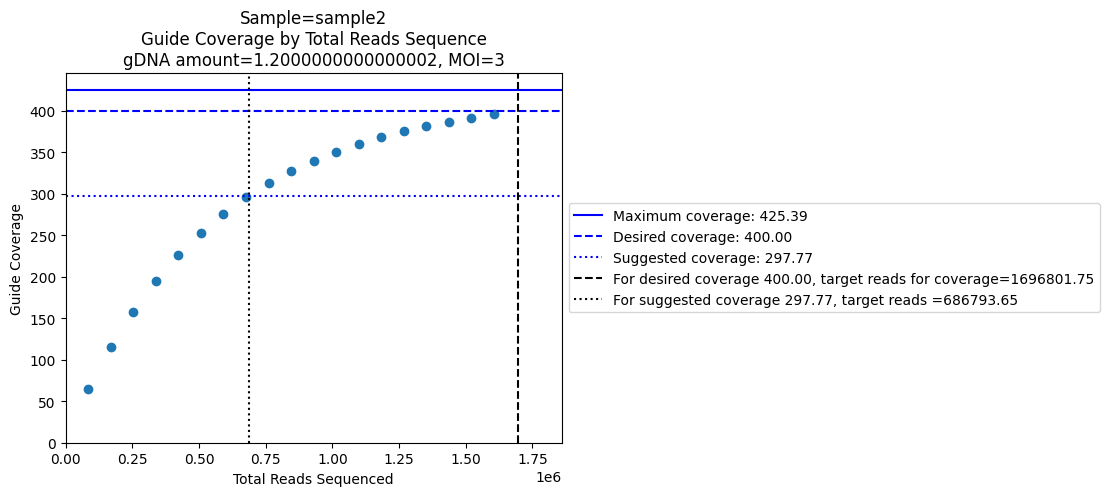

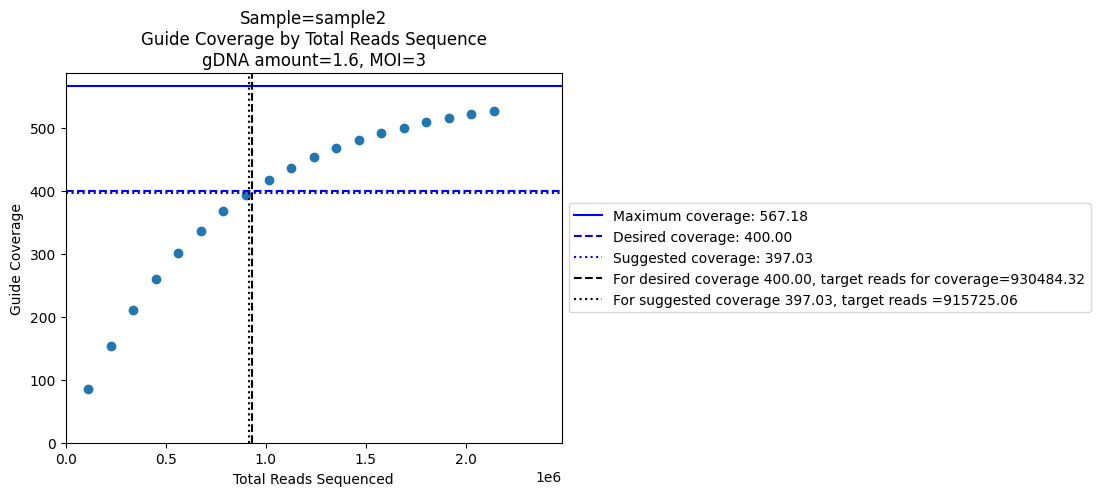

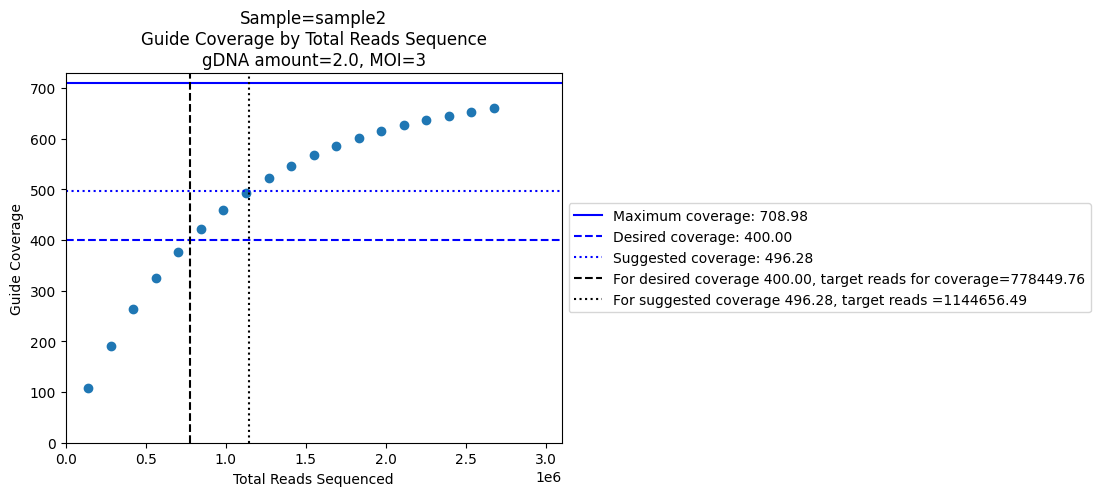

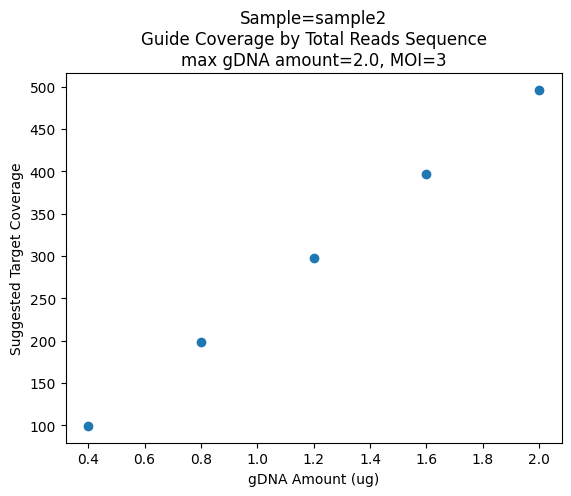

Processing sample: sample3
[0.3 0.6 0.9 1.2 1.5]


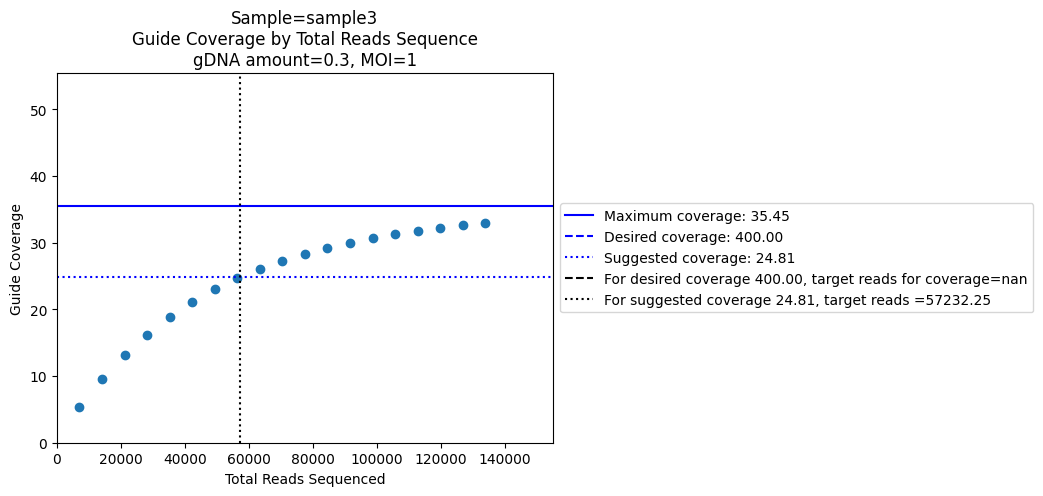

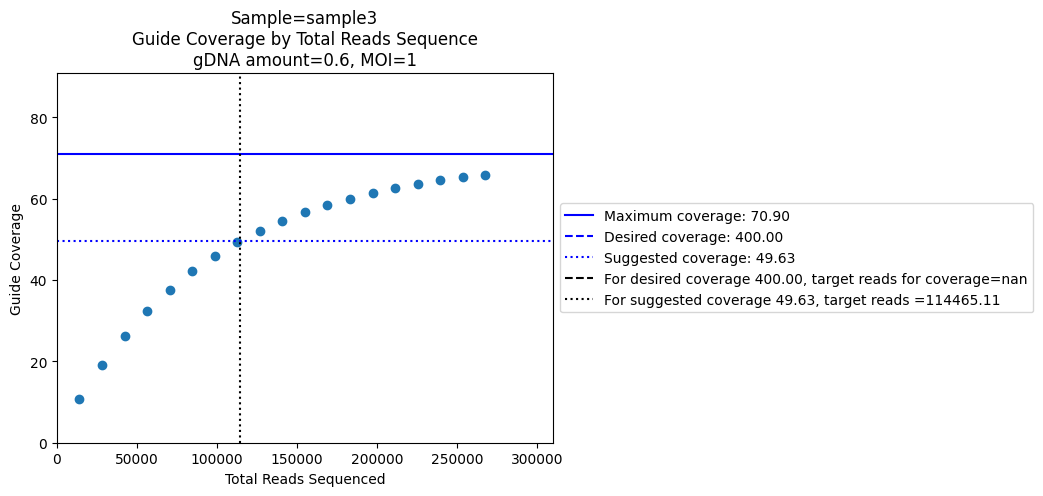

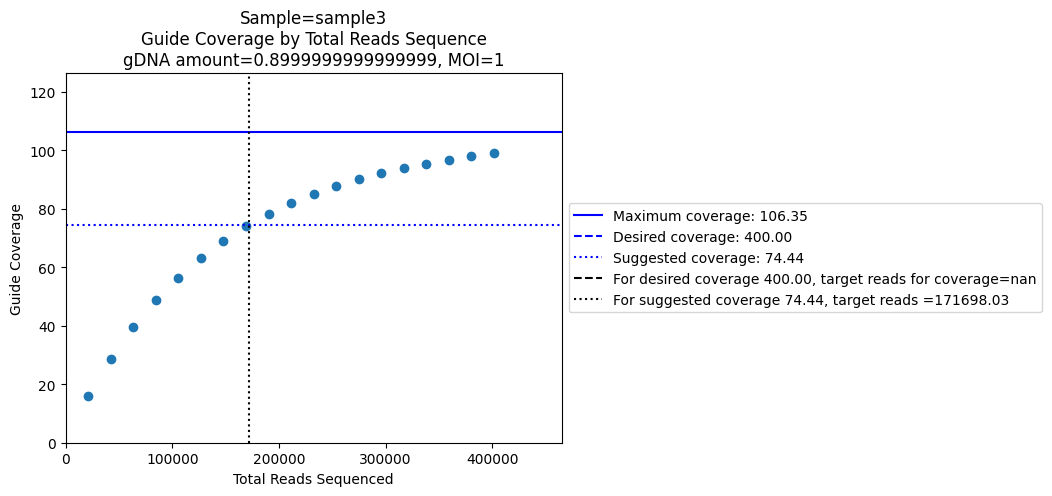

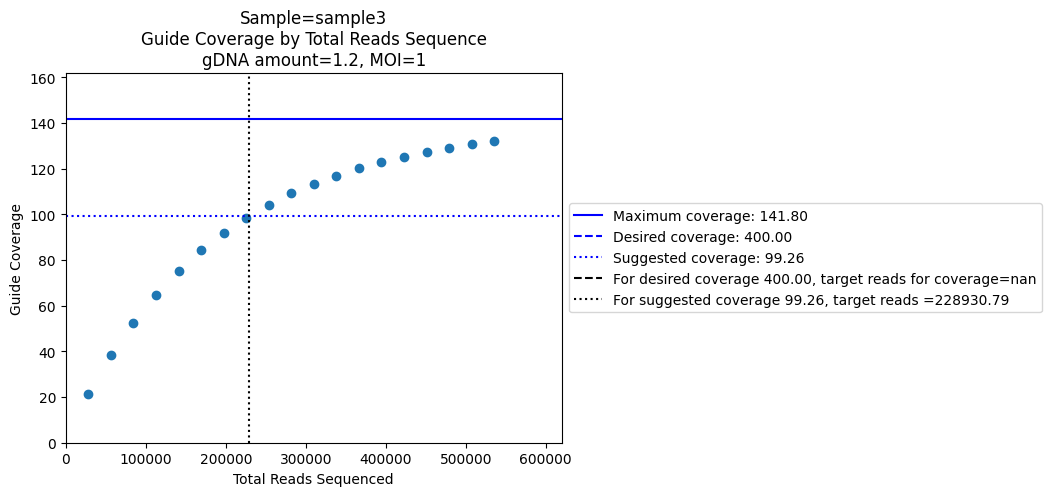

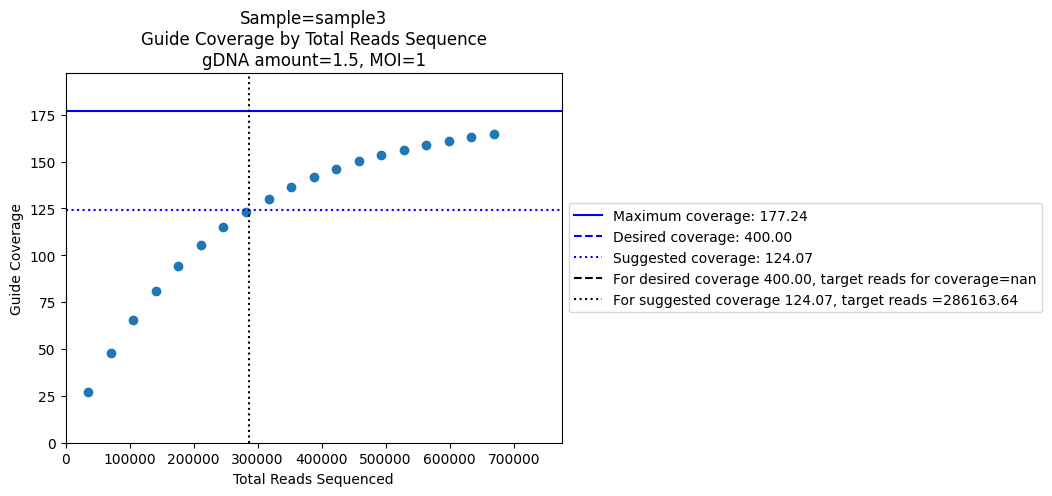

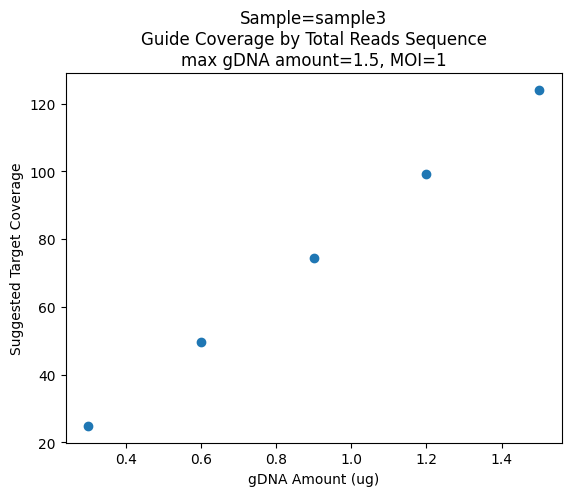

In [34]:
def process_row(row):
    return crispr_library_prep.get_target_coverage_per_sample(
        ideal_gDNA_amount=None,
        max_gDNA_amount=row["gDNA_amount_ug"], 
        moi=row["moi"],
        sample_name=row["sample_name"],
        guide_library_size=row["guide_library_size"], 
        target_coverage_input=row["target_coverage_input"], 
        perfection_rate=row["perfection_rate"],
        target_coverage_percentage=target_coverage_percentage,
        max_target_coverage_input=max_target_coverage_input,
        cores=1)
    
result_dict_list = sample_sheet.apply(process_row, axis=1)

In [32]:
result_dict_list[0].keys()

NameError: name 'result_dict_list' is not defined

{'target_read_amount_suggested': 161451.49335989516,
 'target_coverage_suggested': 70.0,
 'target_read_amount_desired': nan,
 'target_coverage_desired': 400,
 'total_reads_targets_simulated_list': array([ 19875.,  39750.,  59625.,  79500.,  99375., 119250., 139125.,
        159000., 178875., 198750., 218625., 238500., 258375., 278250.,
        298125., 318000., 337875., 357750., 377625.]),
 'guide_coverages_simulated_list': [15.142037896624517,
  26.983912510041378,
  37.08767433246794,
  45.71934073675011,
  53.102758073950056,
  59.426488525592816,
  64.84954461743813,
  69.50616813440753,
  73.50981280635152,
  76.95647002150533,
  79.92744777425736,
  82.49169408183451,
  84.70774179074513,
  86.62533816421505,
  88.2868119098457,
  89.72822059222294,
  90.98031512770194,
  92.06935087150211,
  93.0177705495305],
 'get_reads_for_desired_target_coverage_callable': functools.partial(<function get_target_coverage_linear_interop at 0x000002EFD922F670>, array([15.1420379 , 26.98391251, 

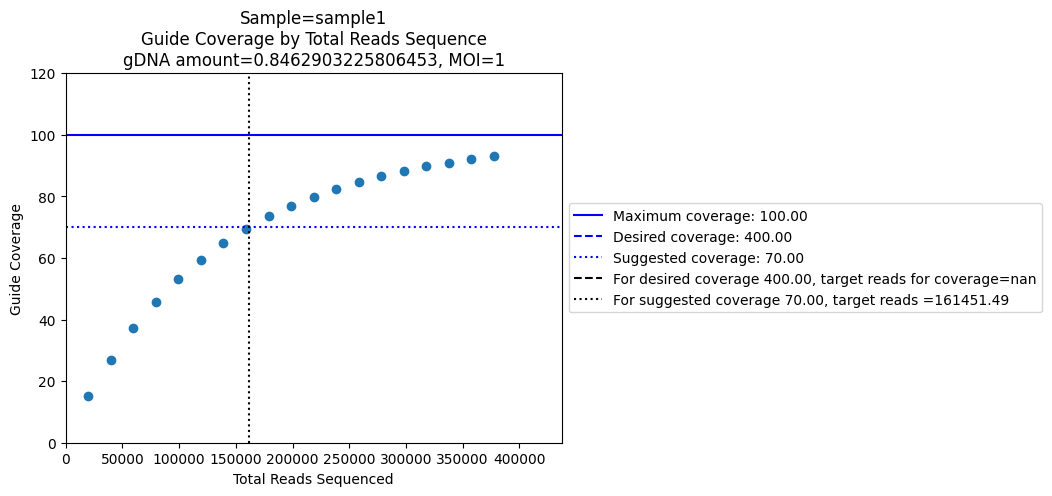

In [50]:
result_dict_list[0]["get_target_coverage_for_gDNA_callable"](0.8462903225806453)  ["target_coverage_suggested"] ["target_read_amount_suggested"]

In [29]:
result_dict_list[0]["target_gDNA_for_max_coverage_result"]
result_dict_list[0]["max_gDNA_target_coverage_suggested_result"]
result_dict_list[0]["ideal_gDNA_target_coverage_suggested_result"]

(nan, None, 600)

In [ ]:
result_dict_list[0]["get_gDNA_for_suggested_target_coverage_callable"](60)

0.8462903225806453
1.2089861751152073
1.8134792626728111
2.4179723502304147
3.0224654377880187
3.6269585253456222
4.835944700460829
6.0449308755760365
7.253917050691244


../crispr_library_prep/crispr_library_prep\CrisprLibraryPrep.py:167: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


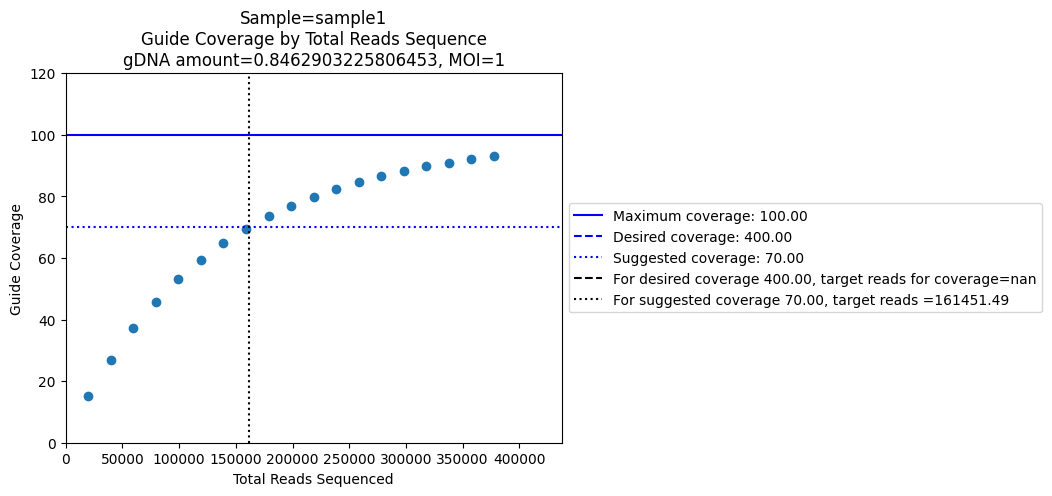

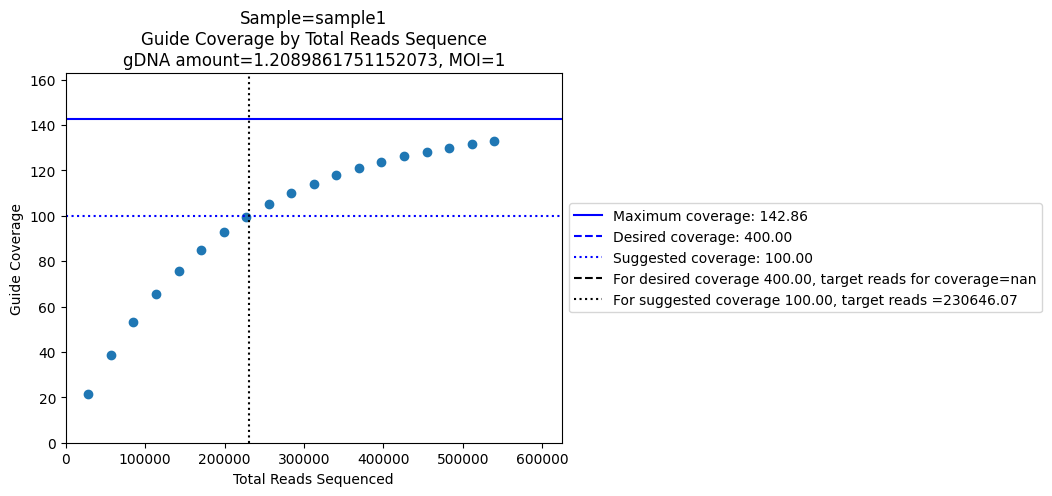

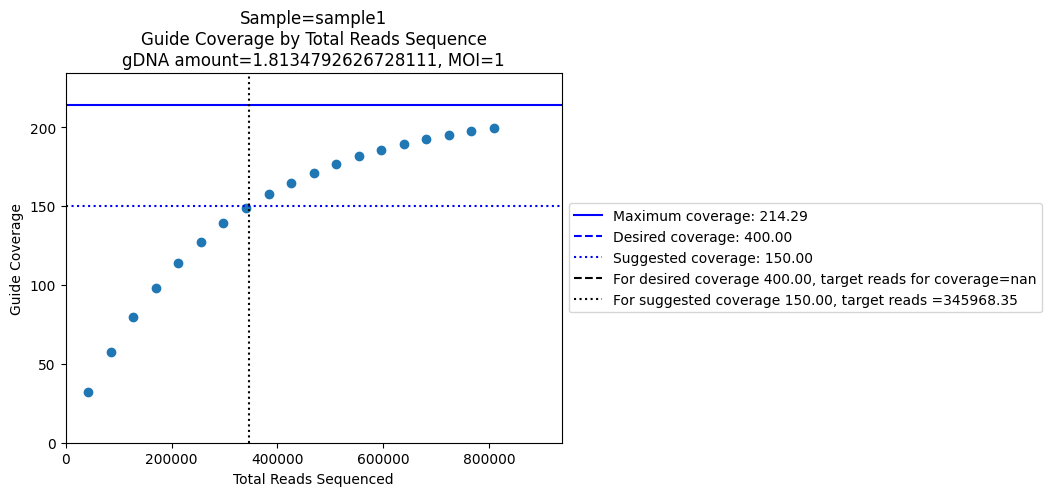

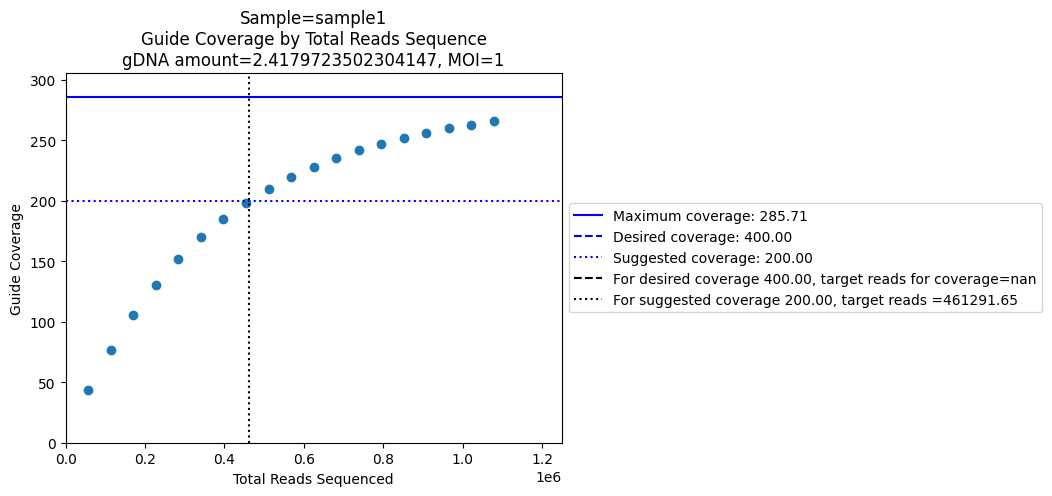

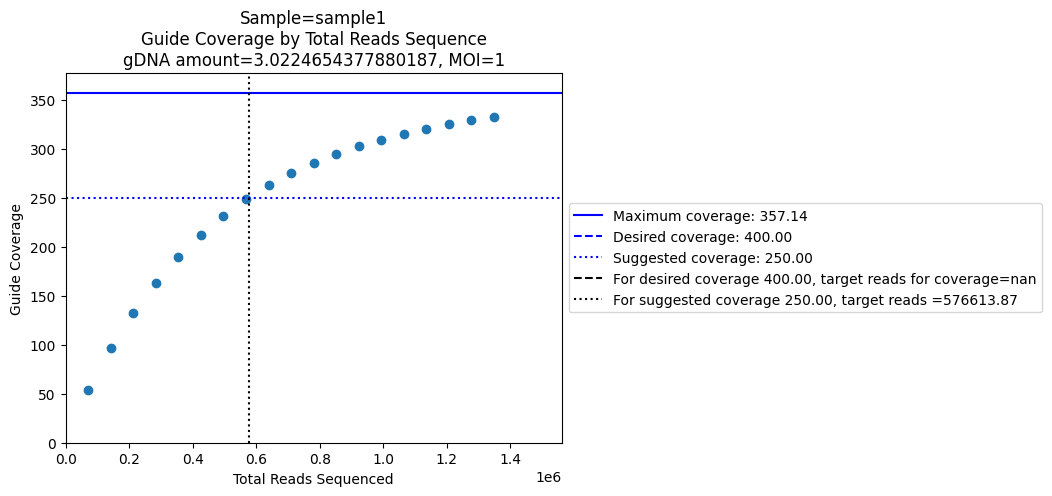

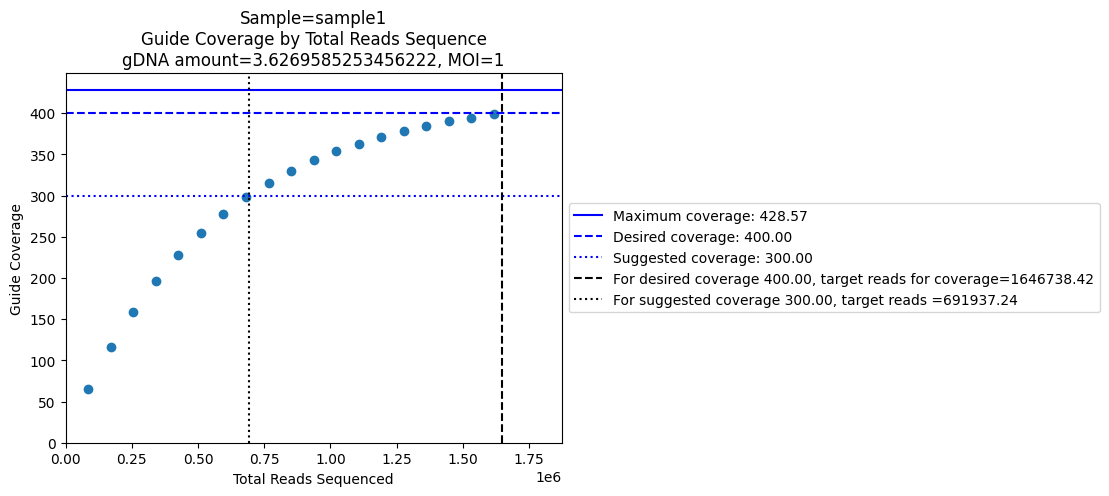

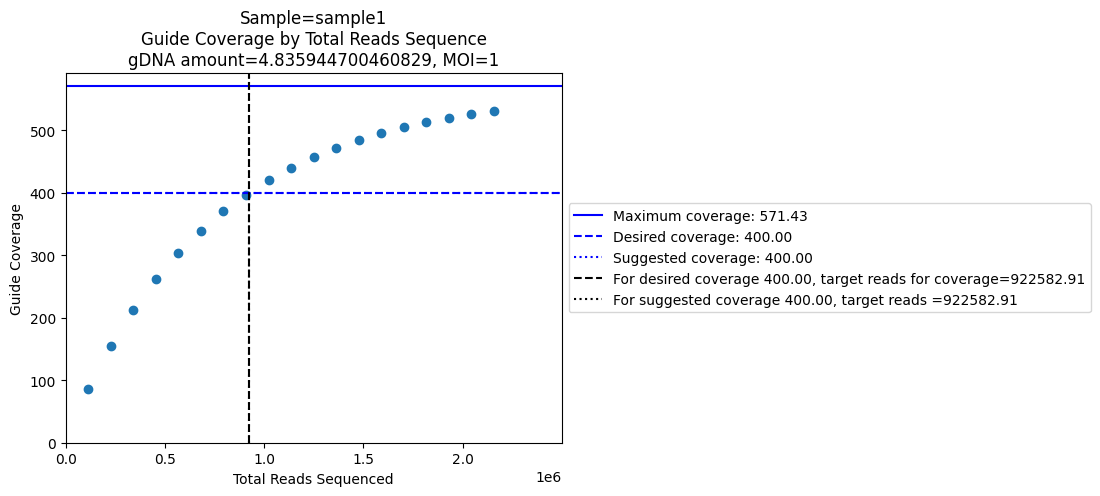

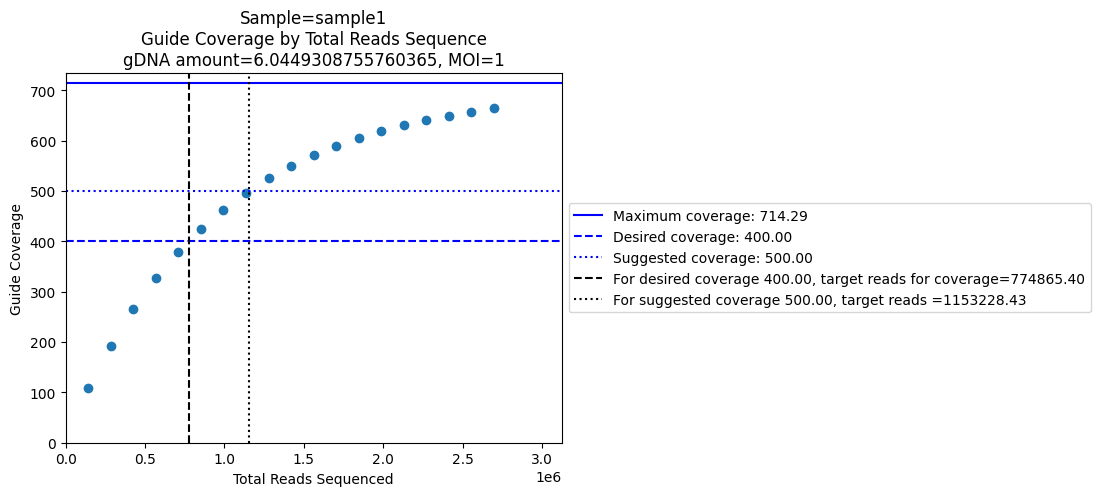

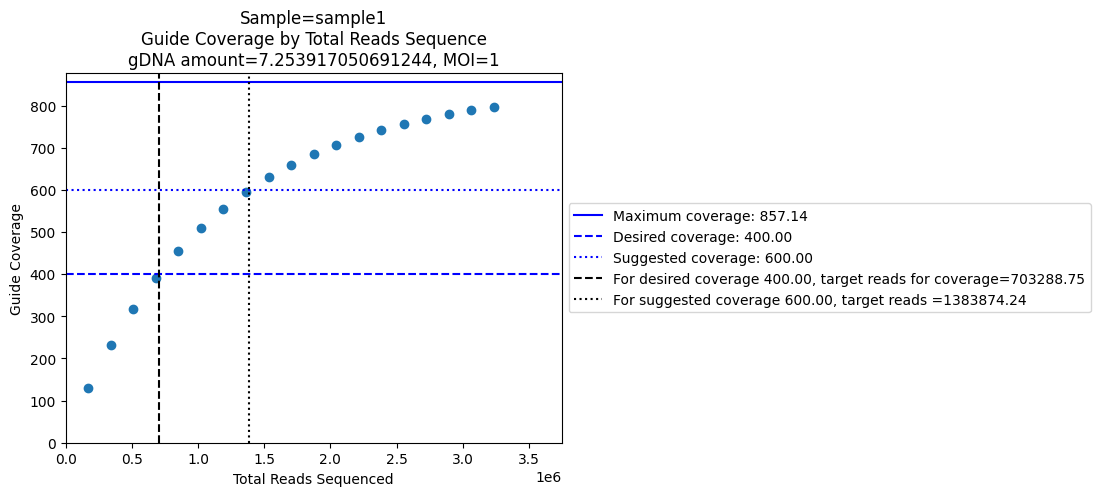

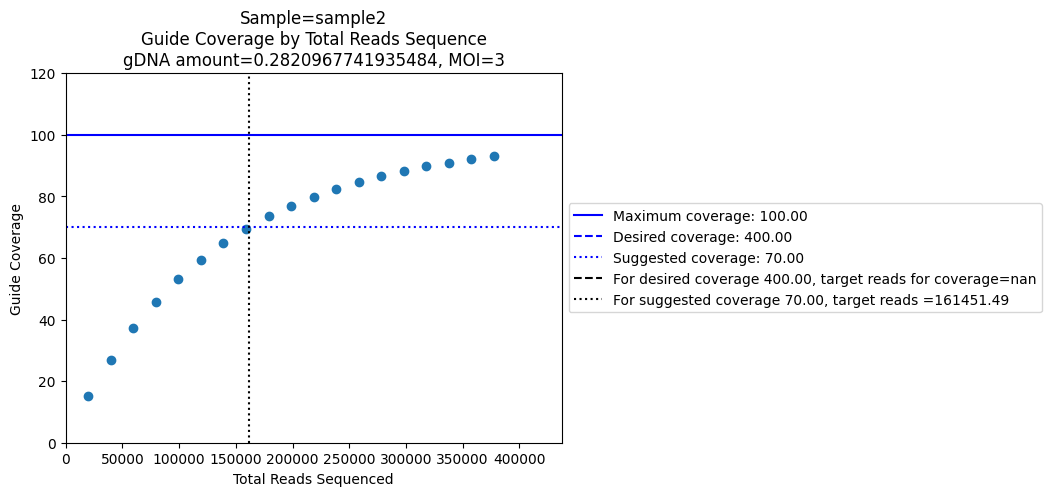

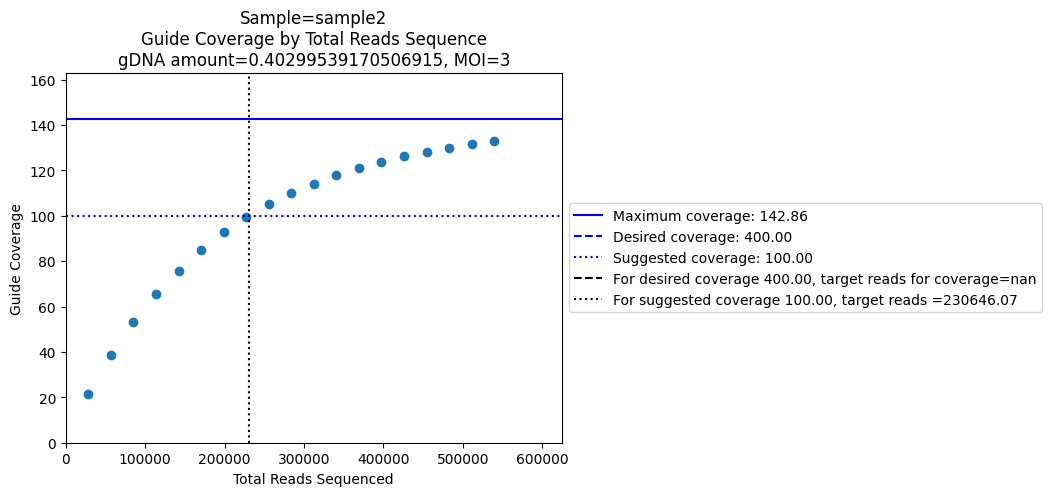

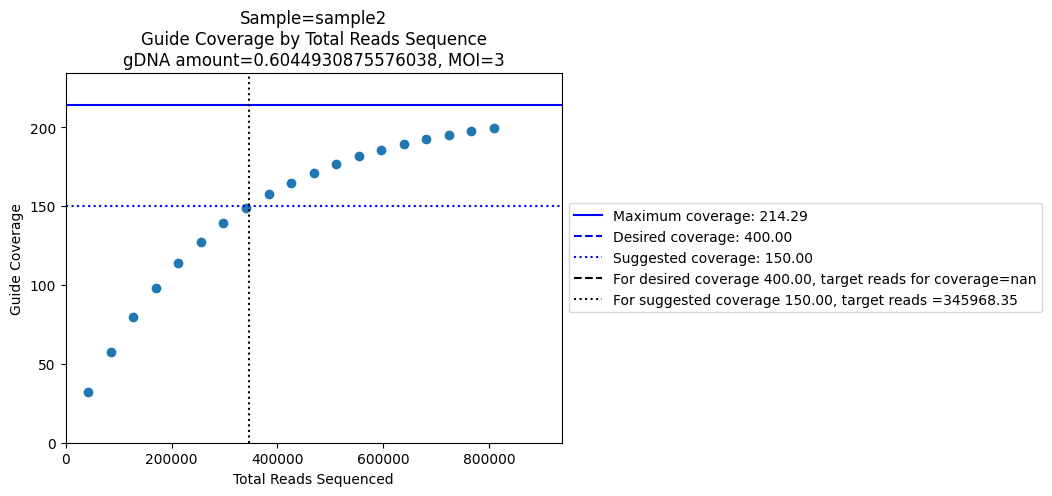

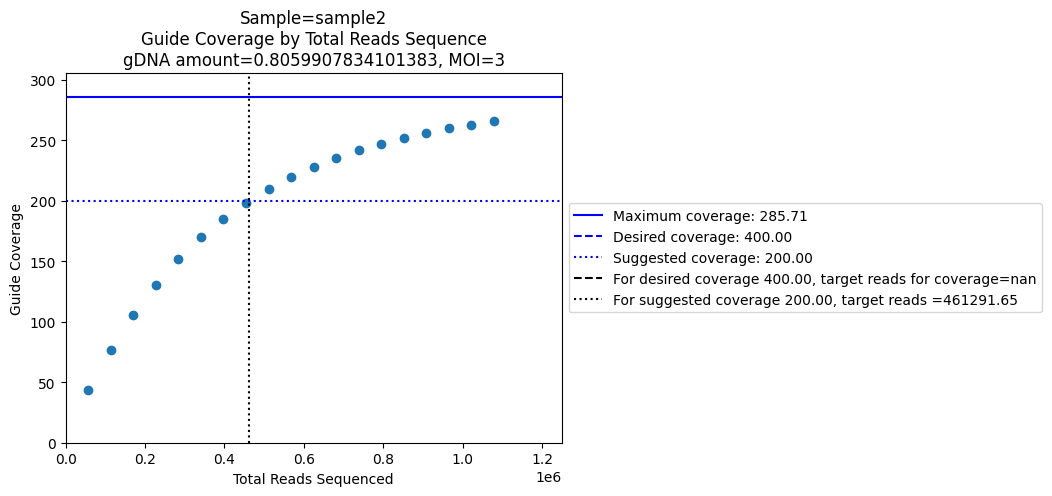

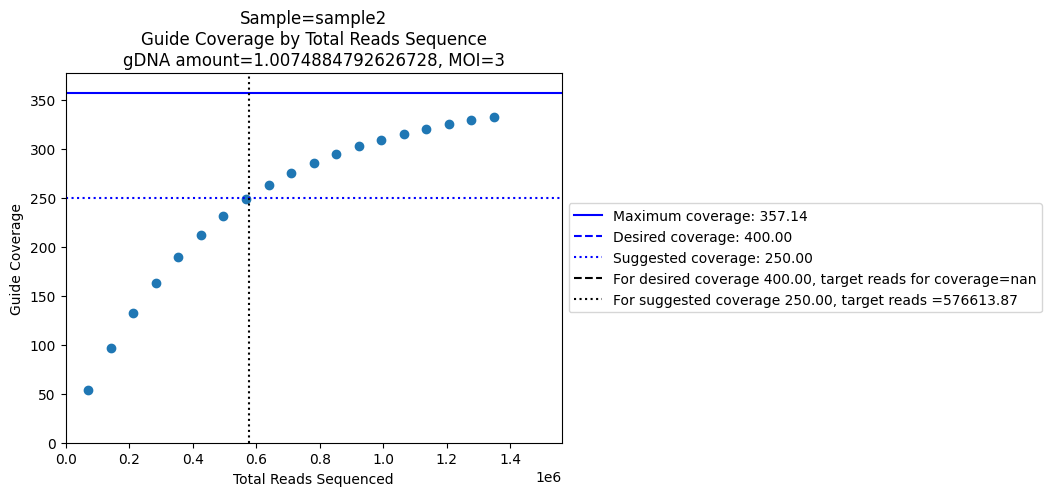

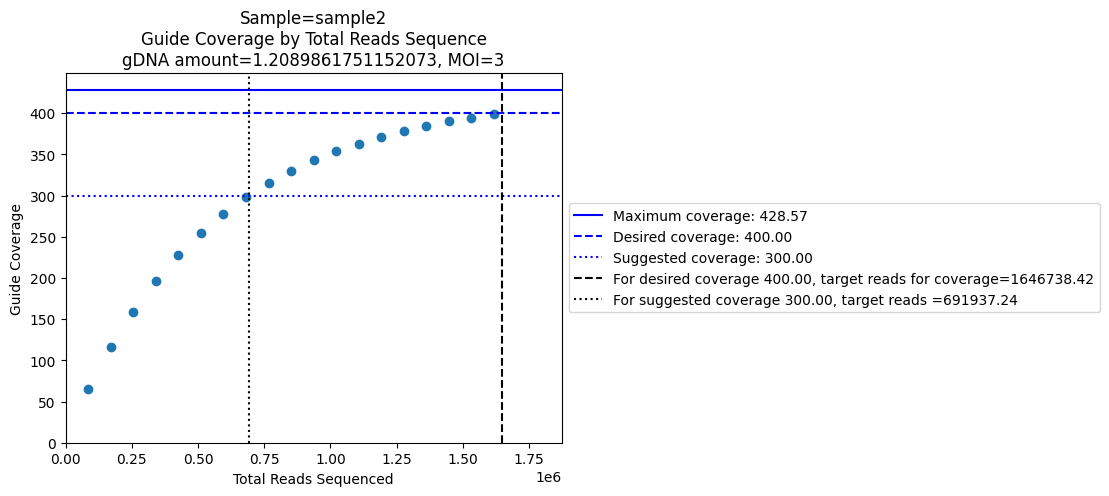

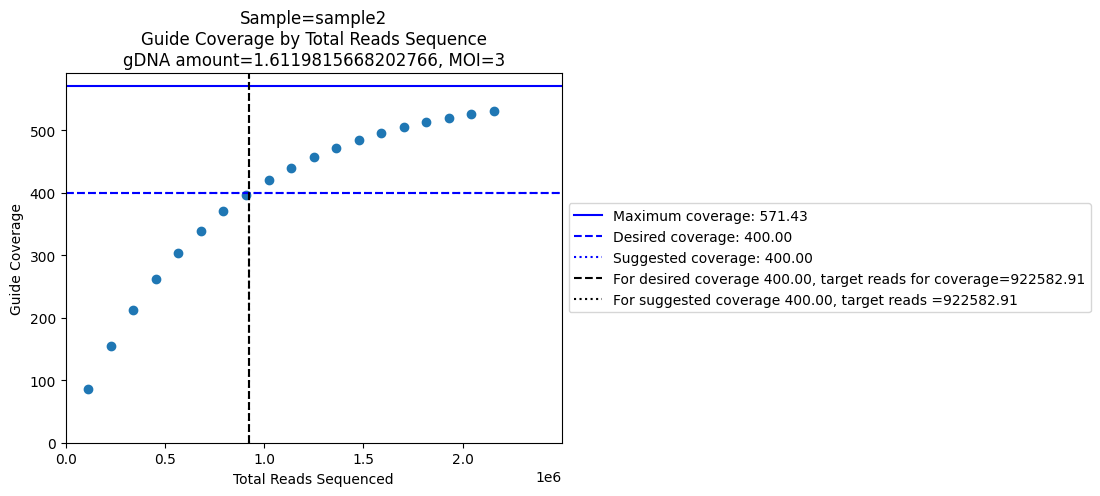

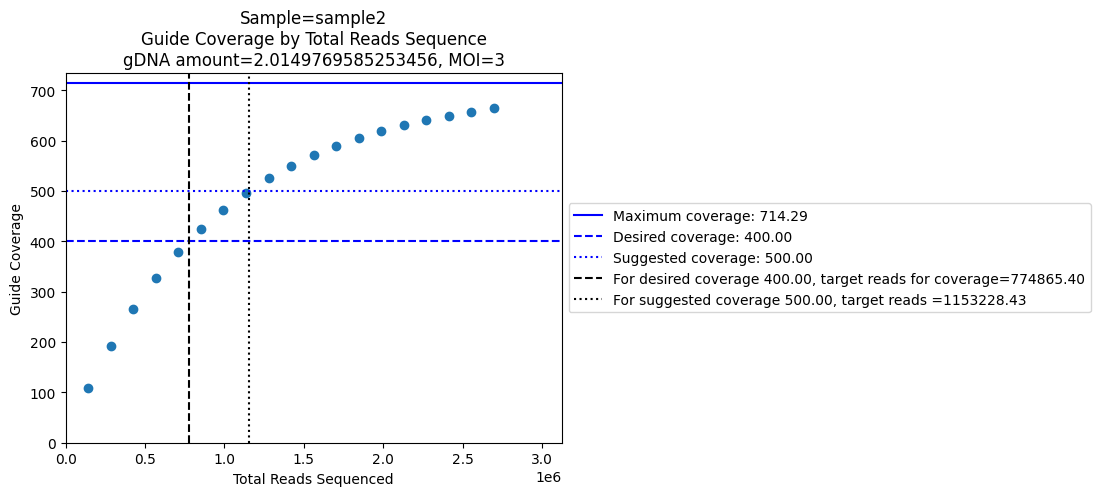

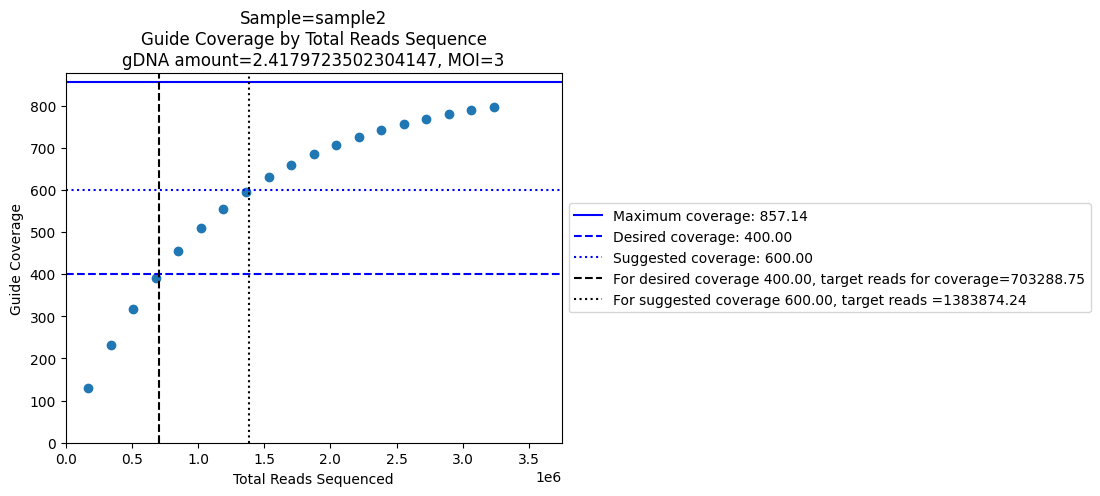

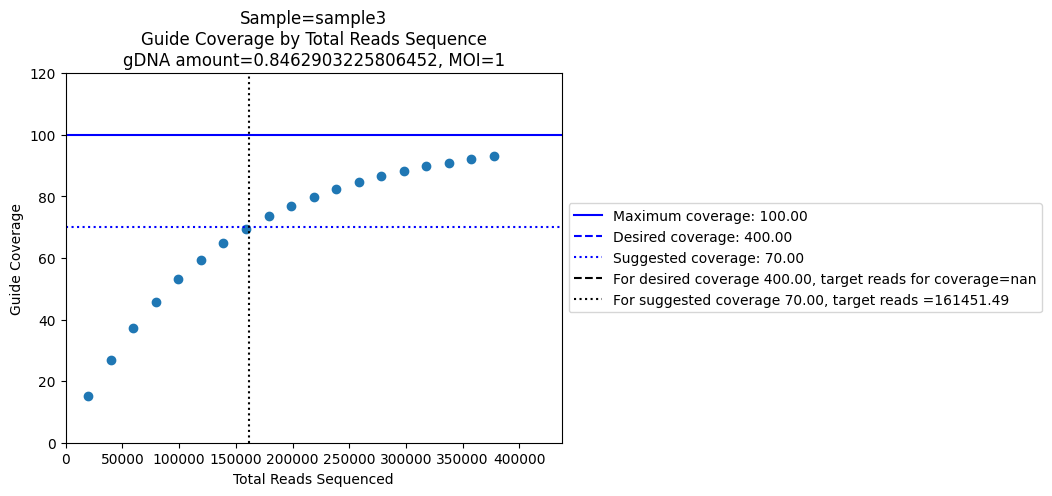

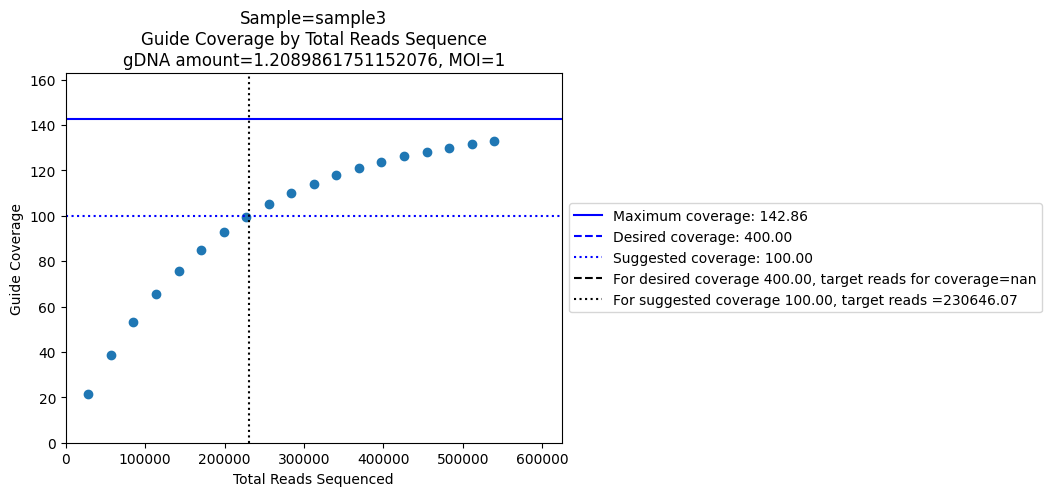

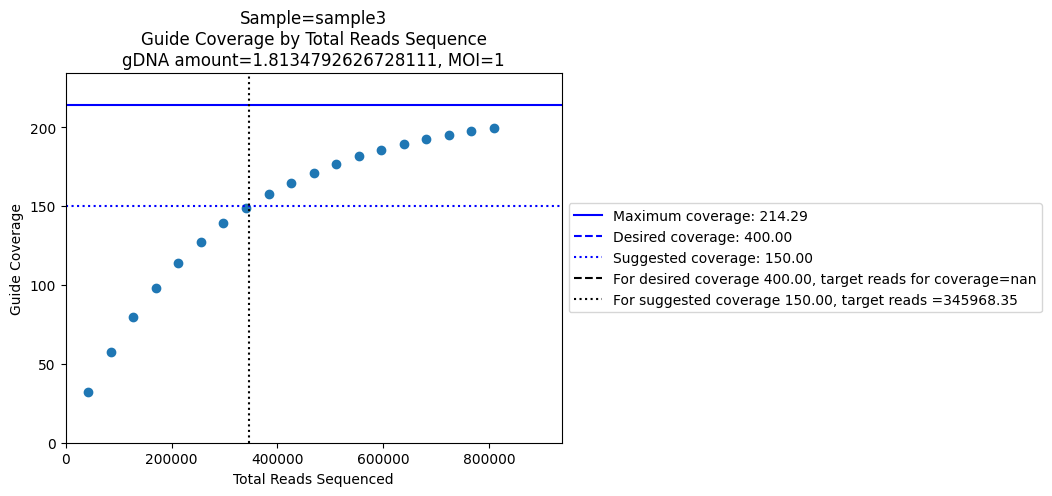

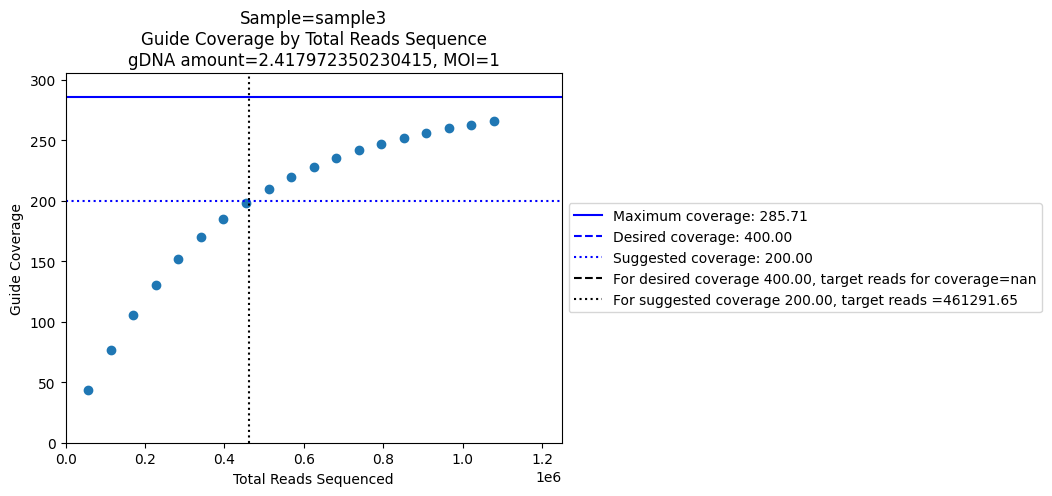

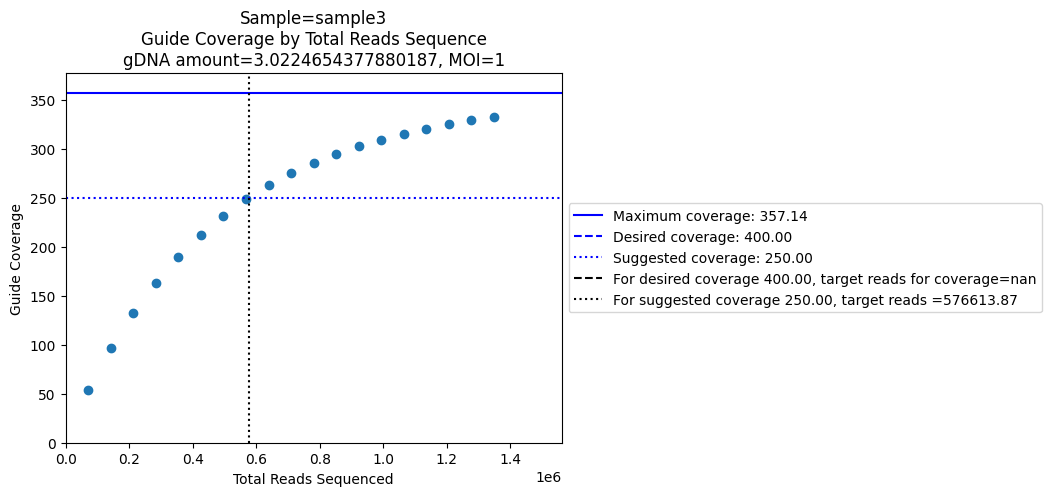

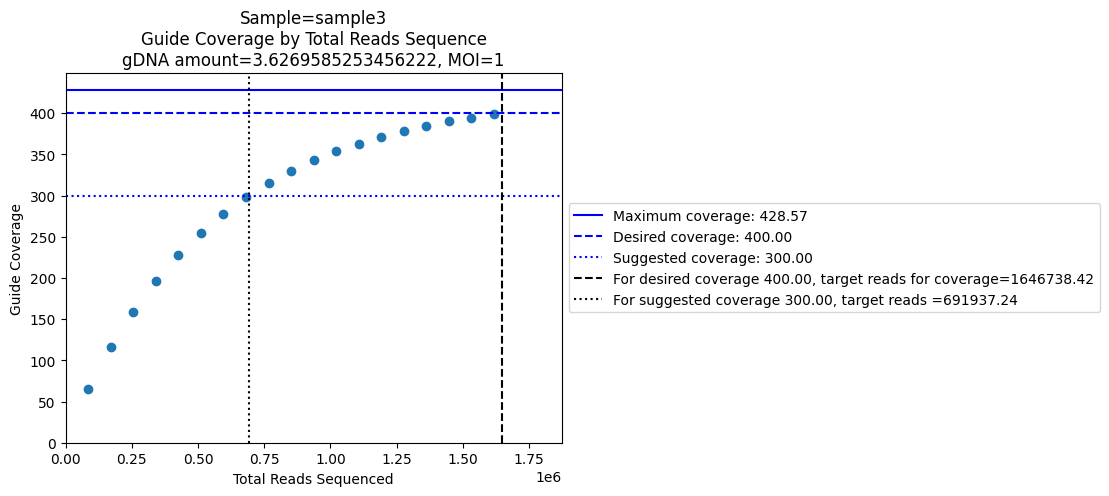

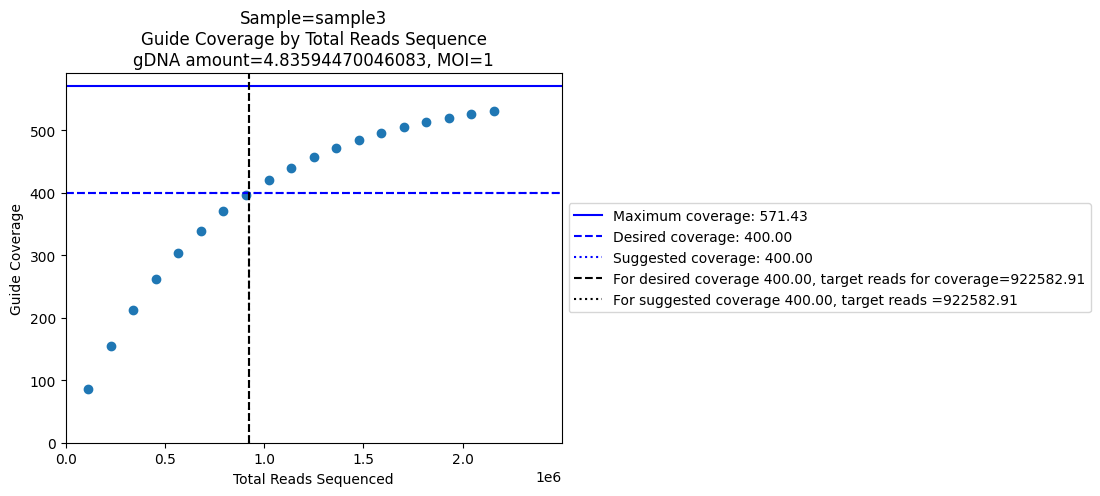

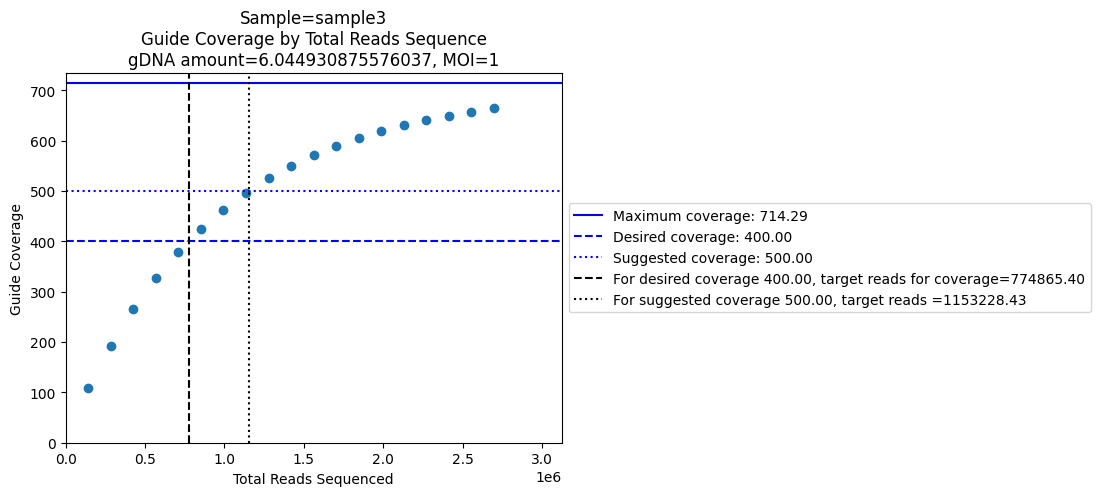

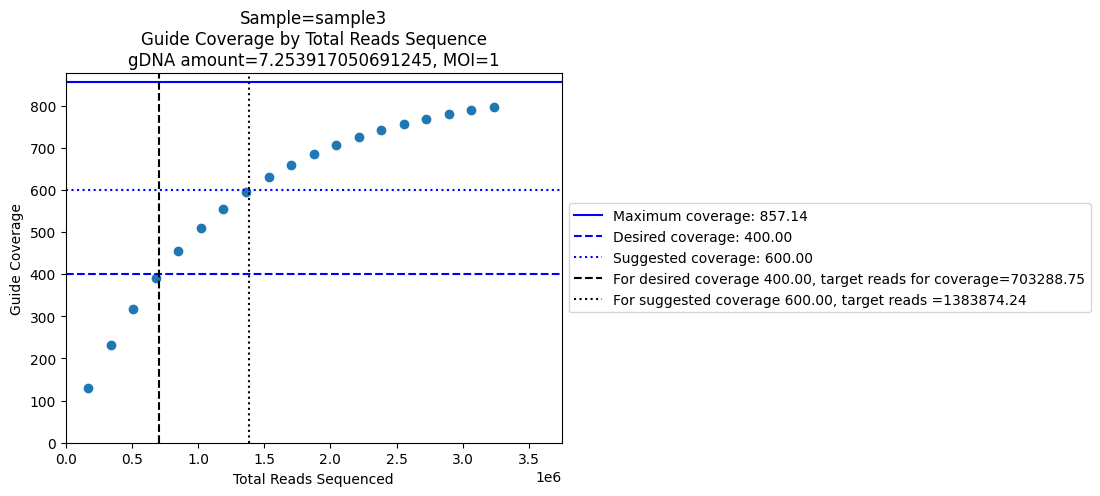

In [55]:
result_series_list = []
for result_dict in result_dict_list:
    
    target_coverage_suggested_list = []
    target_read_amount_suggested_list = []
    gDNA_for_target_coverage_list = []
    for suggested_target_coverage_amount in suggested_target_coverage_amounts:
        gDNA_for_target_coverage = result_dict["get_gDNA_for_suggested_target_coverage_callable"](suggested_target_coverage_amount)
        
        target_coverage_result = result_dict["get_target_coverage_for_gDNA_callable"](gDNA_for_target_coverage)  
        
        target_coverage_suggested = target_coverage_result["target_coverage_suggested"]
        target_read_amount_suggested = target_coverage_result["target_read_amount_suggested"]

        target_coverage_suggested_list.append(target_coverage_suggested)
        target_read_amount_suggested_list.append(target_read_amount_suggested)
        gDNA_for_target_coverage_list.append(gDNA_for_target_coverage)

    added_values = []
    added_indices = []    
    for i in range(len(suggested_target_coverage_amounts)):
        added_values.extend([
            gDNA_for_target_coverage_list[i],
            target_coverage_suggested_list[i], 
            target_read_amount_suggested_list[i]])
        
        added_indices.extend([
            f"gDNA_for_suggested_target_coverage_{suggested_target_coverage_amounts[i]}",
            f"coverage_for_suggested_target_coverage_{suggested_target_coverage_amounts[i]}",
            f"reads_for_suggested_target_coverage_{suggested_target_coverage_amounts[i]}"])
    
    result_series_values = [
        f"{result_dict['target_gDNA_for_max_coverage_result'][0]:.2f}",
        f"{result_dict['target_gDNA_for_max_coverage_result'][1]['target_coverage_suggested']:.2f}" if result_dict['target_gDNA_for_max_coverage_result'][1] is not None else None,
        f"{result_dict['target_gDNA_for_max_coverage_result'][2]:.2f}",
        f"{result_dict['max_gDNA_target_coverage_suggested_result'][0]:.2f}",
        f"{result_dict['max_gDNA_target_coverage_suggested_result'][1]['target_coverage_suggested']:.2f}" if result_dict['max_gDNA_target_coverage_suggested_result'][1] is not None else None,
        f"{result_dict['ideal_gDNA_target_coverage_suggested_result'][0]:.2f}" if result_dict['ideal_gDNA_target_coverage_suggested_result'][0] is not None else None,
        f"{result_dict['ideal_gDNA_target_coverage_suggested_result'][1]['target_coverage_suggested']:.2f}" if result_dict['ideal_gDNA_target_coverage_suggested_result'][1] is not None else None,
    ]
    result_series_values.extend(added_values)
    

    result_series_indices = ["target_gDNA_for_max_coverage", "target_gDNA_target_coverage_suggested", "max_target_coverage_input", 
    "max_gDNA_amount", "max_gDNA_target_coverage_suggested", 
    "ideal_gDNA_amount", "ideal_gDNA_target_coverage_suggested"]
    result_series_indices.extend(added_indices)

    result_series = pd.Series(result_series_values, index=result_series_indices)
    result_series_list.append(result_series)

result_df = pd.DataFrame(result_series_list)

sample_sheet_with_results = sample_sheet.copy()
sample_sheet_with_results = pd.concat([sample_sheet_with_results, result_df], axis=1)

In [56]:
sample_sheet_with_results

sample_name  gDNA_amount_ug  moi  guide_library_size  target_coverage_input  \
0     sample1             2.0    1                 795                    400   
1     sample2             2.0    3                 795                    400   
2     sample3             1.5    1                 795                    400   

   perfection_rate target_gDNA_for_max_coverage  \
0             0.62                          nan   
1             0.62                          nan   
2             0.62                          nan   

  target_gDNA_target_coverage_suggested max_target_coverage_input  \
0                                  None                    600.00   
1                                  None                    600.00   
2                                  None                    600.00   

  max_gDNA_amount  ... reads_for_suggested_target_coverage_300  \
0            2.00  ...                           691937.244699   
1            2.00  ...                           691937.244699   
2            1.50  ...                           691937.244699   

  gDNA_for_suggested_target_coverage_400  \
0                               4.835945   
1                               1.611982   
2                               4.835945   

  coverage_for_suggested_target_coverage_400  \
0                                      400.0   
1                                      400.0   
2                                      400.0   

   reads_for_suggested_target_coverage_400  \
0                            922582.913809   
1                            922582.913809   
2                            922582.913809   

   gDNA_for_suggested_target_coverage_500  \
0                                6.044931   
1                                2.014977   
2                                6.044931   

   coverage_for_suggested_target_coverage_500  \
0                                       500.0   
1                                       500.0   
2                                       500.0   

   reads_for_suggested_target_coverage_500  \
0                             1.153228e+06   
1                             1.153228e+06   
2                             1.153228e+06   

   gDNA_for_suggested_target_coverage_600  \
0                                7.253917   
1                                2.417972   
2                                7.253917   

   coverage_for_suggested_target_coverage_600  \
0                                       600.0   
1                                       600.0   
2                                       600.0   

   reads_for_suggested_target_coverage_600  
0                             1.383874e+06  
1                             1.383874e+06  
2                             1.383874e+06  

[3 rows x 40 columns]

In [9]:
import numpy as np

max_gDNA_amount = 20
gDNA_intervals_count = 5
np.arange(max_gDNA_amount/gDNA_intervals_count, max_gDNA_amount, max_gDNA_amount/gDNA_intervals_count)

array([ 4.,  8., 12., 16.])